# En este notebook se analiza el comportamiento de los diferentes grupos de postulantes de a cuerdo a sus edades. 
## Para esto se toman 3 grupos de postulantes: 
### - Los menores de 23 años (18 - 24 años).
### - Los que se encuentran entre 25 años y 34 años inclusive (23 - 34 años).
### - Los mayores de 35 años.

In [1]:
# Se importan las librerías necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime
import sys
#reload(sys) # now sys.setdefaultencoding() is visible
#sys.setdefaultencoding('utf-8')
#%run double-pendulum.py

pd.options.mode.chained_assignment = None

In [2]:
# Se leen los dataframes.
postulantesEducacion = pd.read_csv('../Data/fiuba_1_postulantes_educacion.csv')
postulantesGeneroYEdad = pd.read_csv('../Data/fiuba_2_postulantes_genero_y_edad.csv')
oportunidadVistas = pd.read_csv('../Data/fiuba_3_vistas.csv')
oportunidadPostulaciones = pd.read_csv('../Data/fiuba_4_postulaciones.csv')
avisosOnline = pd.read_csv('../Data/fiuba_5_avisos_online.csv')
avisosDetalle = pd.read_csv('../Data/fiuba_6_avisos_detalle.csv')

In [3]:
# Elimino los postulantes cuyos ids o fechas de nacimiento son nulas.

# Elimino las filas que no tengan id del postulante.
postulantesEducacion.dropna(subset = ['idpostulante'], inplace = True)
postulantesGeneroYEdad.dropna(subset = ['idpostulante'], inplace = True)

# Creo un nuevo dataframe con los postulantes que tengan fecha de nacimiento.
postulantesConEdad = postulantesGeneroYEdad.dropna(subset=['fechanacimiento'])

In [4]:
# Creo una nueva columna con la edad del postulante. Descarto los postulantes cuyas edades no pueden ser averiguadas.

# Paso la columna fecha de nacimiento a un datetime.
postulantesConEdad['fechanacimiento'] = pd.to_datetime(postulantesConEdad['fechanacimiento'], errors='coerce')

# Creo la columna edad como diferencia entre la fecha actual y la fecha de nacimiento.
fechaActual = pd.Timestamp(datetime.datetime.now())
postulantesConEdad['edad'] = (fechaActual - postulantesConEdad['fechanacimiento']).astype('<m8[Y]')

# Elimino los postulantes sin edades.
postulantesConEdad.dropna(subset = ['edad'], inplace = True)

# Descarto la columna fecha de nacimiento.
postulantesConEdad.drop('fechanacimiento', 1, inplace = True)

In [5]:
# Creo un unico dataframe para los datos del postulante.

# Renombro las columnas del dataframe de educacion a algo mas descriptivo.
postulantesEducacion.rename(columns={'nombre': 'niveleducativo', 'estado': 'estadoniveleducation'}, inplace = True)

# Hago un left join tomando todos los registros del dataframe que contiene la edad.
postulantes = pd.merge(postulantesConEdad, postulantesEducacion, on = 'idpostulante', how = 'left')

# Tomo los campos relacionado a lo educativo, los uno en uno solo y elimino las dos columnas no necesarias.
postulantes['educacion'] = postulantes['niveleducativo'] + '-' + postulantes['estadoniveleducation']
postulantes.drop('niveleducativo', 1, inplace = True)
postulantes.drop('estadoniveleducation', 1, inplace = True)

In [6]:
# Agrego al dataframe de detalles de aviso una columna que diga especifique si sigue online o esta offline.

# Agrego una columna booleana al avisos online para que despues quede en el left merge.
avisosOnline['online'] = True

# Hago el merge entre los detalles y la tabla de online, luego completo los Nan de los offline con False.
avisos = pd.merge(avisosDetalle, avisosOnline, on = 'idaviso', how = 'left')
avisos['online'].fillna(False, inplace = True)

# Teniendo los dataframe de avisos, postulantes, vistas de aviso y postulaciones de aviso se procede a dar respuestas a las siguientes preguntas:

### 1) ¿Cuáles son las areas de trabajo mas visitadas por los diferentes grupos? ¿Y las menos visitadas?
### 2) ¿Cuáles son las areas de trabajo que reciben mas postulaciones de los diferentes grupos?

## Antes de empezar a responder las diferentes preguntas vamos a hacer un análisis demográfico de cada grupo:
- Cuantos postulantes hay en cada grupo.
- Como se conforman los diferentes grupos en cuanto a sexo.
- Cual es el nivel educacional de cada grupo y de cada grupo dividido por sexo.

In [7]:
# TODO: Gastón - Aca va el análisis demográfico.

### Antes de empezar a responder las preguntas creo los dataframe que voy a estar utilizando en el desarrollo de las mismas.

In [44]:
# Renombro la columna idAviso de las vistas a idaviso sin mayuscula así queda homogeneo.
oportunidadVistas.rename(columns={'idAviso': 'idaviso'}, inplace = True)

# Dataframe de vistas.
vistas = pd.merge(oportunidadVistas, avisos, on = 'idaviso', how = 'left')
vistas = pd.merge(vistas, postulantes, on = 'idpostulante', how = 'left')

# Dataframe de postulaciones.
postulaciones = pd.merge(oportunidadPostulaciones, avisos, on = 'idaviso', how = 'left')
postulaciones = pd.merge(postulaciones, postulantes, on = 'idpostulante', how = 'left')

,idaviso,idpostulante,fechapostulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,online,sexo,edad,educacion
0,1112257047,NM5M,2018-01-15 16:22:34,1.0,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,False,FEM,47.0,Secundario-Graduado
1,1111920714,NM5M,2018-02-06 09:04:50,1.0,Telemarketers part-time para venta de tarjetas...,<p>En Randstad Argentina nos encontramos en bú...,Gran Buenos Aires,NaN,NaN,Part-time,Senior / Semi-Senior,Telemarketing,RANDSTAD,False,FEM,47.0,Secundario-Graduado
2,1112346945,NM5M,2018-02-22 09:04:47,1.0,Agente de Telemarketing,"<p style="""">4 Finance, importante empresa fina...",Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Telemarketing,Prestamo Movil,True,FEM,47.0,Secundario-Graduado
3,1112345547,NM5M,2018-02-22 09:04:59,1.0,Telemárketers part time,<p>En Randstad Argentina nos encontramos en bú...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Telemarketing,RANDSTAD,True,FEM,47.0,Secundario-Graduado
4,1112237522,5awk,2018-01-25 18:55:03,1.0,Jefe Contable Zona Barracas,<p>Para Empresa Pyme ubicada en zona de Barrac...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,SPEEDWORK RRHH - #1 en Selección de RRHH,False,FEM,55.0,Universitario-Graduado
5,1112237522,5awk,2018-01-25 18:55:03,1.0,Jefe Contable Zona Barracas,<p>Para Empresa Pyme ubicada en zona de Barrac...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Contabilidad,SPEEDWORK RRHH - #1 en Selección de RRHH,False,FEM,55.0,Terciario/Técnico-Graduado
6,1112277633,5awk,2018-01-29 13:34:44,1.0,Responsable Administrativo Contable,"<div style=""""><p align=""center"" style=""""> </p>...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,Grupo Suessa,False,FEM,55.0,Universitario-Graduado
7,1112277633,5awk,2018-01-29 13:34:44,1.0,Responsable Administrativo Contable,"<div style=""""><p align=""center"" style=""""> </p>...",Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Administración,Grupo Suessa,False,FEM,55.0,Terciario/Técnico-Graduado
8,1112302347,5awk,2018-02-07 20:49:22,1.0,Jefe de Contabilidad,<p>Empresa de telecomunicaciones incorporará a...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Impuestos,ANTINA,False,FEM,55.0,Universitario-Graduado
9,1112302347,5awk,2018-02-07 20:49:22,1.0,Jefe de Contabilidad,<p>Empresa de telecomunicaciones incorporará a...,Gran Buenos Aires,NaN,NaN,Full-time,Jefe / Supervisor / Responsable,Impuestos,ANTINA,False,FEM,55.0,Terciario/Técnico-Graduado


In [9]:
# Para los siguientes análisis voy a tener en cuenta la cantidad de avisos por area.
cantidadAvisosArea = avisos[['nombre_area']]

# Elimino los registros que no tengan nombre de area.
cantidadAvisosArea.dropna(subset = ['nombre_area'], inplace = True)

# Creo una columna con todos 1 que va a servir de contador, luego realizo el groupby y por ultimo el ordenamiento.
cantidadAvisosArea['cantidadavisos'] = 1
cantidadAvisosArea = cantidadAvisosArea.groupby(['nombre_area'], as_index = False).count()
cantidadAvisosArea = cantidadAvisosArea.sort_values(by = 'cantidadavisos', ascending = False)

## 1 - ¿Cuáles son las areas de trabajo mas visitadas por los diferentes grupos? ¿Y las menos visitadas?

In [52]:
# Tomo del dataframe de vistas el nombre de area y la edad solamente.
areaVisitadas = vistas[['nombre_area', 'edad']]

# Agrego una columna cantidad para que luego haga las veces de contador en el group by.
areaVisitadas['cantidad'] = 1
areaVisitadas.dropna(subset = ['edad'], inplace = True)

# Divido el dataframe en los 3 grupos de edades.
areaVisitadas1 = areaVisitadas[areaVisitadas['edad'] < 25]
areaVisitadas1.drop('edad', 1, inplace = True)

areaVisitadas2 = areaVisitadas[(areaVisitadas['edad'] >= 25) & (areaVisitadas['edad'] < 35)]
areaVisitadas2.drop('edad', 1, inplace = True)

areaVisitadas3 = areaVisitadas[areaVisitadas['edad'] >= 35]
areaVisitadas3.drop('edad', 1, inplace = True)

# Agrupo segun el area.
areaVisitadas1 = areaVisitadas1.groupby(['nombre_area'], as_index = False).count()
areaVisitadas2 = areaVisitadas2.groupby(['nombre_area'], as_index = False).count()
areaVisitadas3 = areaVisitadas3.groupby(['nombre_area'], as_index = False).count()

# Ordeno de mayor a menor.
areaVisitadas1 = areaVisitadas1.sort_values(by = 'cantidad', ascending = False)
areaVisitadas2 = areaVisitadas2.sort_values(by = 'cantidad', ascending = False)
areaVisitadas3 = areaVisitadas3.sort_values(by = 'cantidad', ascending = False)

# Tomo las 10 areas mas visitadas y las menos visitadas de cada grupo.
areaMasVisitadas1 = areaVisitadas1.head(10)
areaMenosVisitadas1 = areaVisitadas1.tail(10)

areaMasVisitadas2 = areaVisitadas2.head(10)
areaMenosVisitadas2 = areaVisitadas2.tail(10)

areaMasVisitadas3 = areaVisitadas3.head(10)
areaMenosVisitadas3 = areaVisitadas3.tail(10)

# En este analisis se va a analizar la relacion entre la cantidad de avisos de un area y la cantidad de visitas 
# a los avisos de dicha area.

# Agrego a los dataframes de visitas de areas el contador de la cantidad de avisos del area en cuestion.
cantidadAvisosAreaMasVisitadas1 = pd.merge(areaMasVisitadas1, cantidadAvisosArea, on = 'nombre_area', how = 'left')
cantidadAvisosAreaMasVisitadas2 = pd.merge(areaMasVisitadas2, cantidadAvisosArea, on = 'nombre_area', how = 'left')
cantidadAvisosAreaMasVisitadas3 = pd.merge(areaMasVisitadas3, cantidadAvisosArea, on = 'nombre_area', how = 'left')

cantidadAvisosAreaMenosVisitadas1 = pd.merge(areaMenosVisitadas1, cantidadAvisosArea, on = 'nombre_area', how = 'left')
cantidadAvisosAreaMenosVisitadas2 = pd.merge(areaMenosVisitadas2, cantidadAvisosArea, on = 'nombre_area', how = 'left')
cantidadAvisosAreaMenosVisitadas3 = pd.merge(areaMenosVisitadas3, cantidadAvisosArea, on = 'nombre_area', how = 'left')

### 1.1 - Análisis para el grupo de 18 a 24 años.

#### 1.1.1 - Tabla con la lista de las areas mas visitadas por el grupo de 18 a 24 años.

In [11]:
areaMasVisitadas1

,nombre_area,cantidad
149,Ventas,74608
2,Administración,50443
123,Recepcionista,33234
13,Atención al Cliente,28748
24,Comercial,24338
21,Call Center,19702
116,Producción,19317
142,Telemarketing,18234
143,Tesorería,11631
22,Camareros,8761


#### 1.1.2 - Grafico que muestra las areas más vistadas para el grupo de 18 a 24 años.

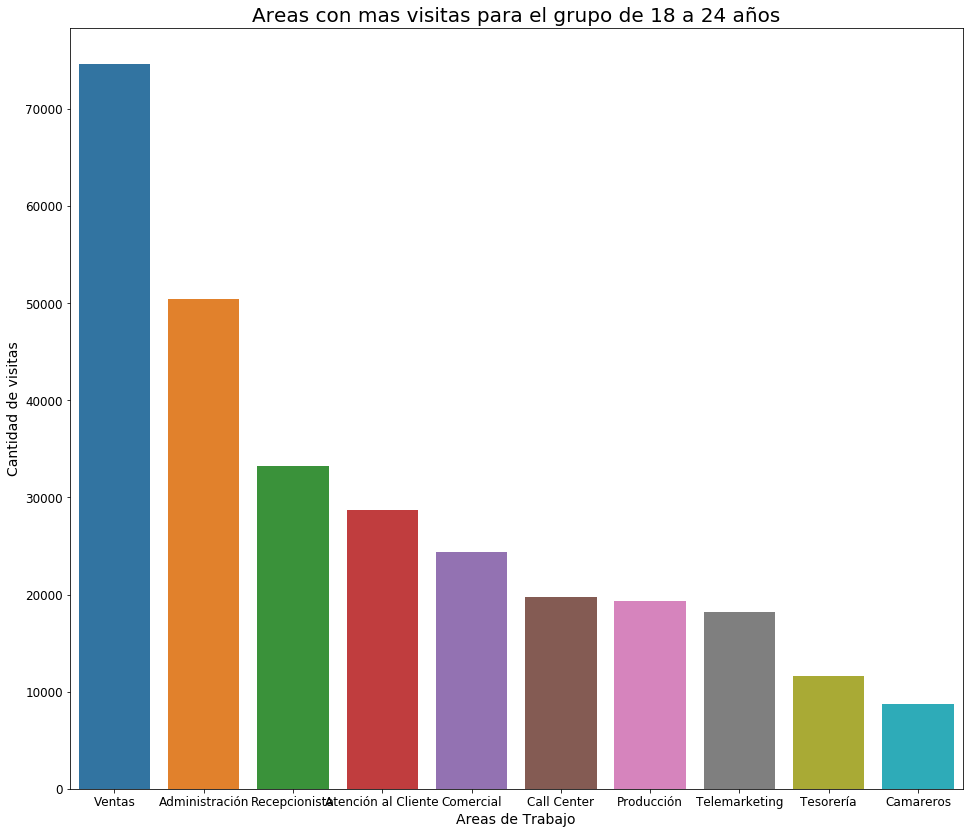

In [12]:
plt.subplots(figsize = (16, 14))
areaMasVisitadas1Plot = sns.barplot(x = areaMasVisitadas1['nombre_area'], y = areaMasVisitadas1['cantidad'], orient = 'v')
areaMasVisitadas1Plot.set_title("Areas con mas visitas para el grupo de 18 a 24 años", fontsize = 20)
areaMasVisitadas1Plot.set_ylabel("Cantidad de visitas", fontsize = 14)
areaMasVisitadas1Plot.set_xlabel("Areas de Trabajo", fontsize = 14)
areaMasVisitadas1Plot.tick_params(labelsize = 12)
plt.show()

#### 1.1.3 - Tabla con la cantidad de avisos para las areas mas visitadas por el grupo de 18 a 24 años.

In [13]:
cantidadAvisosAreaMasVisitadas1

,nombre_area,cantidad,cantidadavisos
0,Ventas,74608,1659
1,Administración,50443,901
2,Recepcionista,33234,151
3,Atención al Cliente,28748,347
4,Comercial,24338,983
5,Call Center,19702,191
6,Producción,19317,821
7,Telemarketing,18234,138
8,Tesorería,11631,137
9,Camareros,8761,48


#### 1.1.4 - Grafico que muestra la cantidad de avisos de las areas mas visitadas por el grupo de 18 a 24 años.

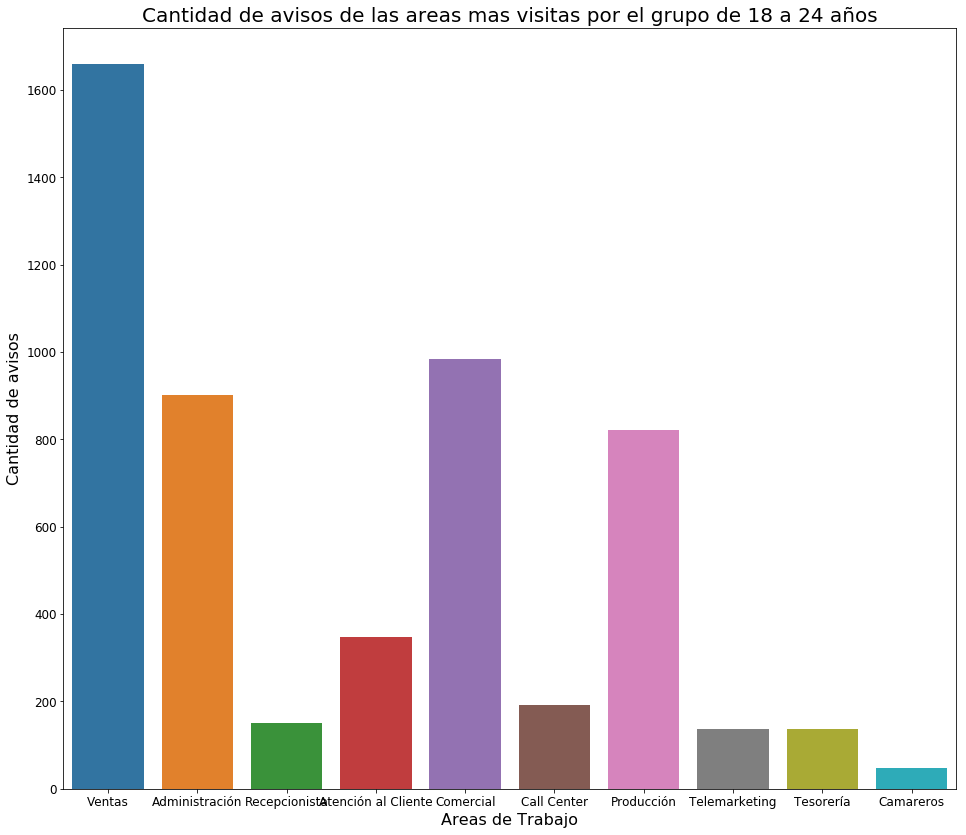

In [14]:
plt.subplots(figsize = (16, 14))
cantidadAvisosAreaMasVisitadaPlot1 = sns.barplot(x = cantidadAvisosAreaMasVisitadas1['nombre_area'], y = cantidadAvisosAreaMasVisitadas1['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMasVisitadaPlot1.set_title("Cantidad de avisos de las areas mas visitas por el grupo de 18 a 24 años", fontsize = 20)
cantidadAvisosAreaMasVisitadaPlot1.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMasVisitadaPlot1.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMasVisitadaPlot1.tick_params(labelsize = 12)
plt.show()

#### 1.1.5 - Grafico acumulado con las cantidad de visitas y publicaciones de las areas mas vistas para el grupo de 18 a 24 años.

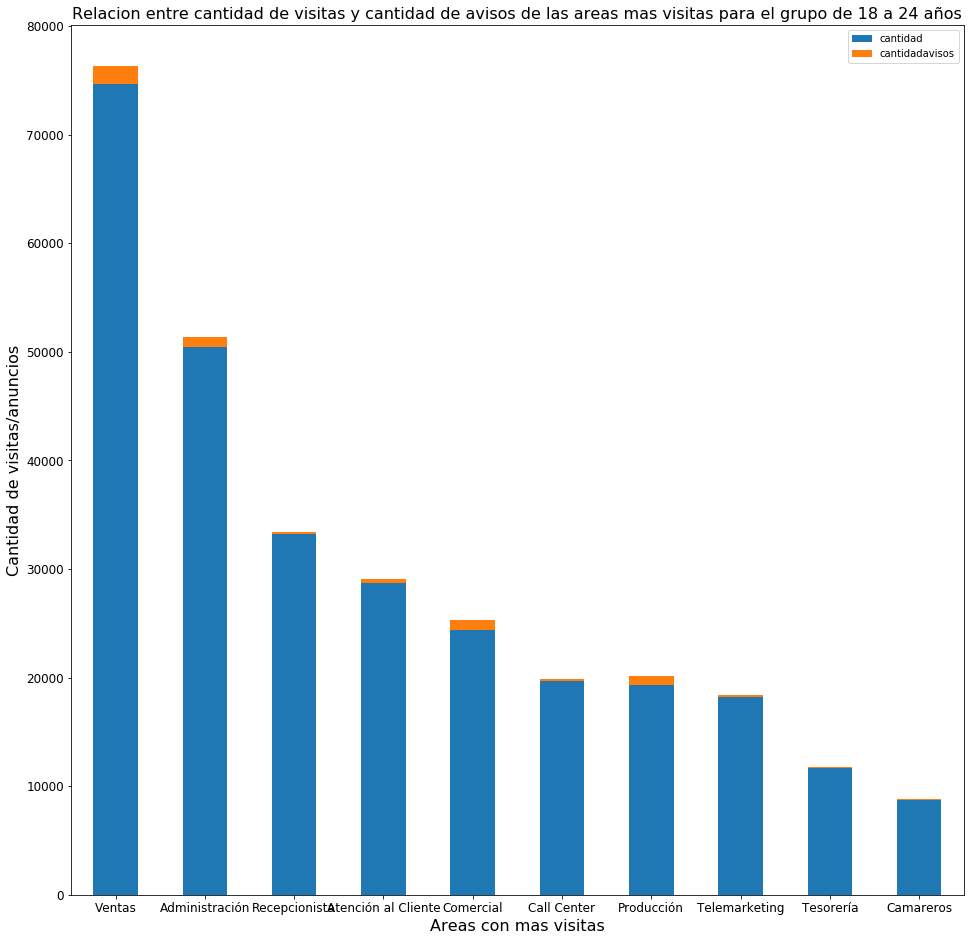

In [15]:
areaMasVisitadasPlotAcumulado1 = cantidadAvisosAreaMasVisitadas1.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 0)
areaMasVisitadasPlotAcumulado1.set_xlabel("Areas con mas visitas", fontsize = 16)
areaMasVisitadasPlotAcumulado1.set_ylabel("Cantidad de visitas/anuncios", fontsize = 16)
areaMasVisitadasPlotAcumulado1.set_title("Relacion entre cantidad de visitas y cantidad de avisos de las areas mas visitas para el grupo de 18 a 24 años", fontsize = 16)
plt.show()

#### 1.1.6 - Tabla con la lista de las areas menos visitadas por el grupo de 18 a 24 años.

In [16]:
areaMenosVisitadas1

,nombre_area,cantidad
25,Comercio Exterior,11
31,Comunicaciones Externas,10
85,Ingeniería de Ventas,10
151,Veterinaria,10
87,Ingeniería en Minas,8
145,Traduccion,7
88,Ingeniería en Petróleo y Petroquímica,7
105,Negocios Internacionales,6
43,Data Warehousing,6
102,Medio Ambiente,3


#### 1.1.7 - Grafico que muestra las areas menos vistadas para el grupo de 18 a 24 años.

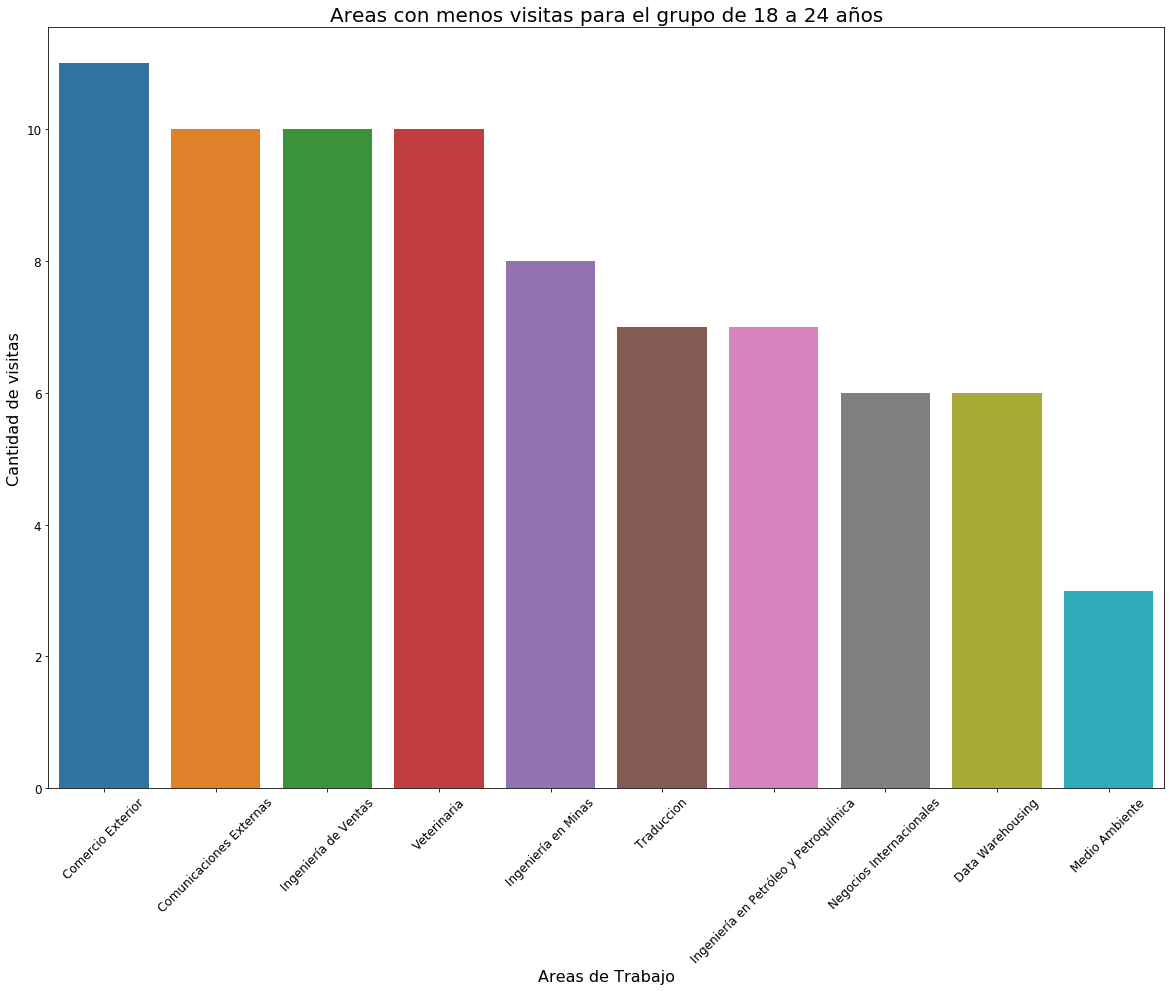

In [17]:
plt.subplots(figsize = (20, 14))
areaMenosVisitadas1Plot = sns.barplot(x = areaMenosVisitadas1['nombre_area'], y = areaMenosVisitadas1['cantidad'], orient = 'v')
areaMenosVisitadas1Plot.set_title("Areas con menos visitas para el grupo de 18 a 24 años", fontsize = 20)
areaMenosVisitadas1Plot.set_ylabel("Cantidad de visitas", fontsize = 16)
areaMenosVisitadas1Plot.set_xlabel("Areas de Trabajo", fontsize = 16)
areaMenosVisitadas1Plot.set_xticklabels(areaMenosVisitadas1Plot.get_xticklabels(), rotation = 45)
areaMenosVisitadas1Plot.tick_params(labelsize = 12)
plt.show()

#### 1.1.8 - Tabla con la cantidad de avisos para las areas menos visitadas para el grupo de 18 a 24 años.

In [18]:
cantidadAvisosAreaMenosVisitadas1

,nombre_area,cantidad,cantidadavisos
0,Comercio Exterior,11,7
1,Comunicaciones Externas,10,1
2,Ingeniería de Ventas,10,16
3,Veterinaria,10,6
4,Ingeniería en Minas,8,6
5,Traduccion,7,1
6,Ingeniería en Petróleo y Petroquímica,7,1
7,Negocios Internacionales,6,3
8,Data Warehousing,6,2
9,Medio Ambiente,3,5


#### 1.1.9 - Grafico que muestra la cantidad de avisos de las areas menos visitadas por el grupo de 18 a 24 años.

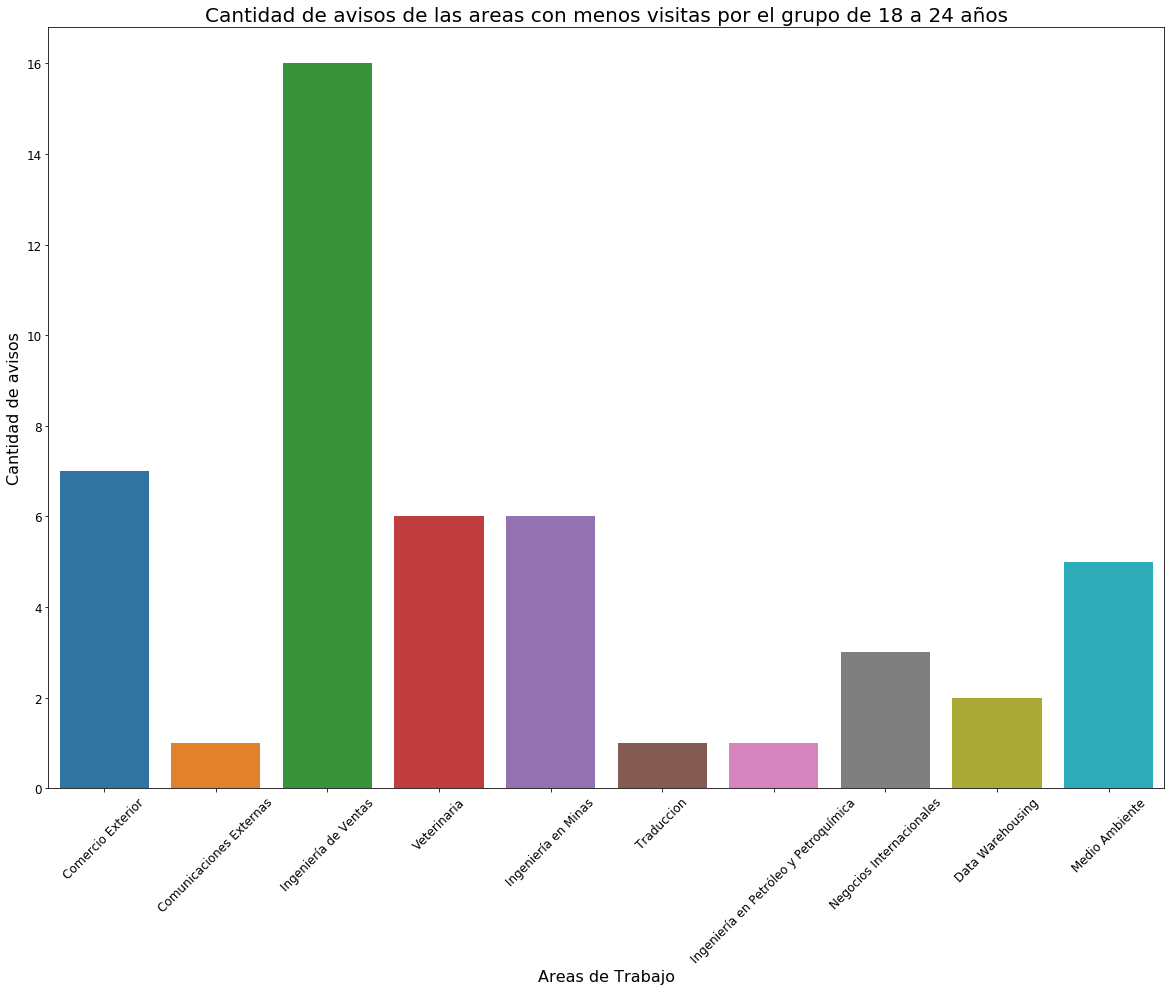

In [19]:
plt.subplots(figsize = (20, 14))
cantidadAvisosAreaMenosVisitadaPlot1 = sns.barplot(x = cantidadAvisosAreaMenosVisitadas1['nombre_area'], y = cantidadAvisosAreaMenosVisitadas1['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMenosVisitadaPlot1.set_title("Cantidad de avisos de las areas con menos visitas por el grupo de 18 a 24 años", fontsize = 20)
cantidadAvisosAreaMenosVisitadaPlot1.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMenosVisitadaPlot1.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMenosVisitadaPlot1.set_xticklabels(cantidadAvisosAreaMenosVisitadaPlot1.get_xticklabels(), rotation = 45)
cantidadAvisosAreaMenosVisitadaPlot1.tick_params(labelsize = 12)
plt.show()

#### 1.1.10 - Grafico acumulado con las cantidad de visitas y avisos de las areas menos vistas para el grupo de 18 a 24 años.

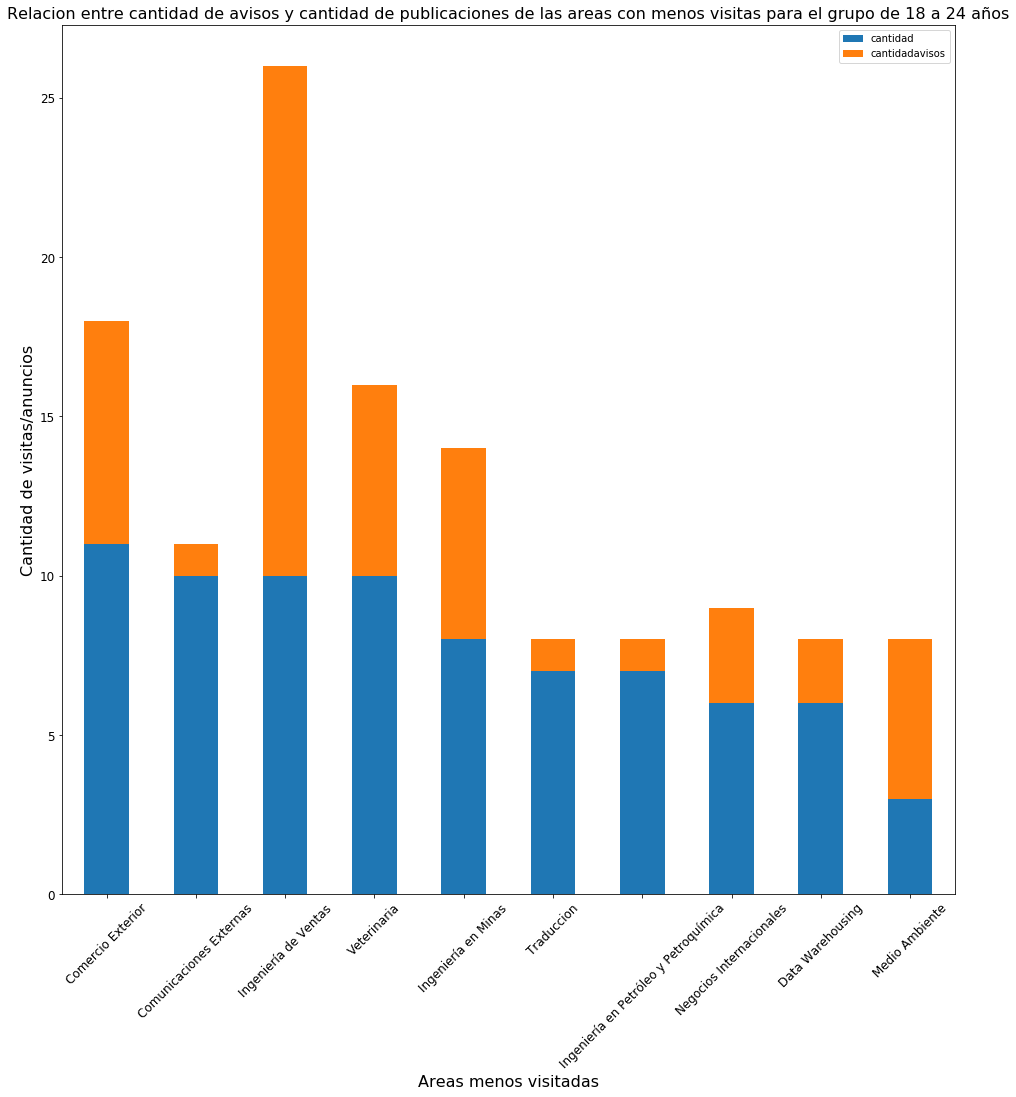

In [20]:
areaMenosVisitadasPlotAcumulado1 = cantidadAvisosAreaMenosVisitadas1.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 45)
areaMenosVisitadasPlotAcumulado1.set_xlabel("Areas menos visitadas", fontsize = 16)
areaMenosVisitadasPlotAcumulado1.set_ylabel("Cantidad de visitas/anuncios", fontsize = 16)
areaMenosVisitadasPlotAcumulado1.set_title("Relacion entre cantidad de avisos y cantidad de publicaciones de las areas con menos visitas para el grupo de 18 a 24 años", fontsize = 16)
plt.show()

### 1.2 - Análisis para el grupo de 25 a 24 años.

#### 1.2.1 - Tabla con la lista de las areas mas visitadas por el grupo de 25 a 34 años.

In [21]:
areaMasVisitadas2

,nombre_area,cantidad
2,Administración,84709
155,Ventas,80009
24,Comercial,43146
121,Producción,39607
13,Atención al Cliente,35385
128,Recepcionista,32943
21,Call Center,21896
149,Tesorería,17973
36,Contabilidad,15243
129,Recursos Humanos,15053


#### 1.2.2 - Grafico que muestra las areas más vistadas para el grupo de 25 a 34 años.

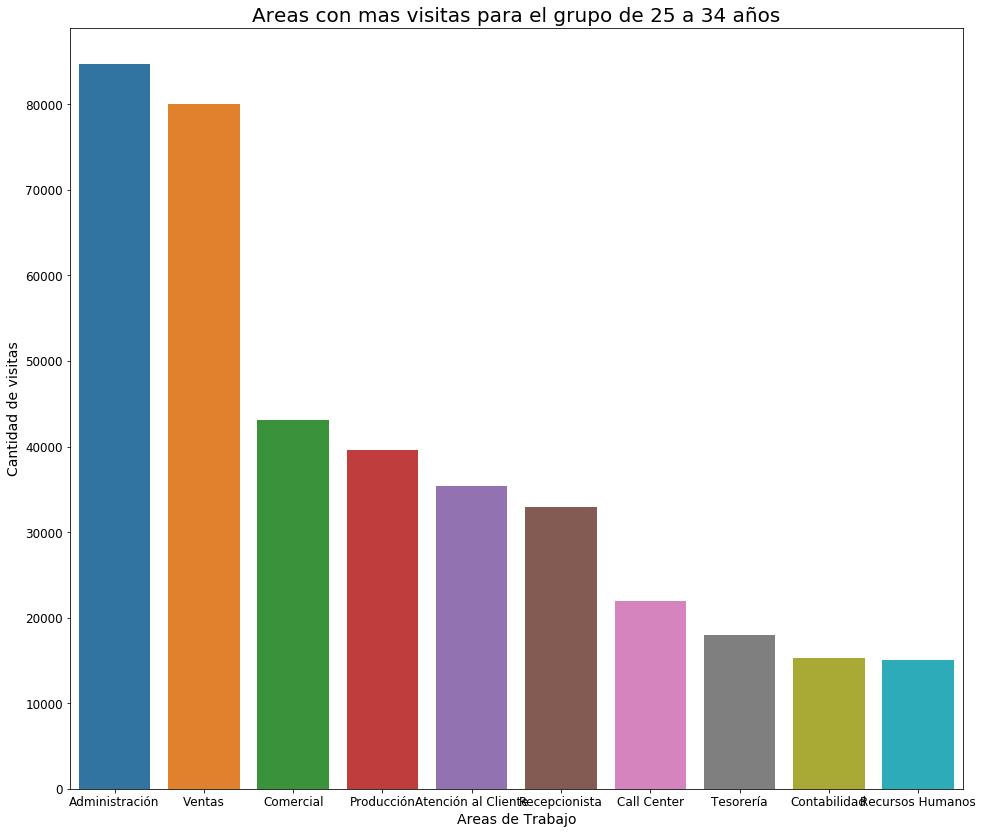

In [22]:
plt.subplots(figsize = (16, 14))
areaMasVisitadas2Plot = sns.barplot(x = areaMasVisitadas2['nombre_area'], y = areaMasVisitadas2['cantidad'], orient = 'v')
areaMasVisitadas2Plot.set_title("Areas con mas visitas para el grupo de 25 a 34 años", fontsize = 20)
areaMasVisitadas2Plot.set_ylabel("Cantidad de visitas", fontsize = 14)
areaMasVisitadas2Plot.set_xlabel("Areas de Trabajo", fontsize = 14)
areaMasVisitadas2Plot.tick_params(labelsize = 12)
plt.show()

#### 1.2.3 - Tabla con la cantidad de avisos para las areas mas visitadas por el grupo de 25 a 34 años.

In [23]:
cantidadAvisosAreaMasVisitadas2

,nombre_area,cantidad,cantidadavisos
0,Administración,84709,901
1,Ventas,80009,1659
2,Comercial,43146,983
3,Producción,39607,821
4,Atención al Cliente,35385,347
5,Recepcionista,32943,151
6,Call Center,21896,191
7,Tesorería,17973,137
8,Contabilidad,15243,416
9,Recursos Humanos,15053,235


#### 1.2.4 - Grafico que muestra la cantidad de avisos de las areas mas visitadas por el grupo de 25 a 34 años.

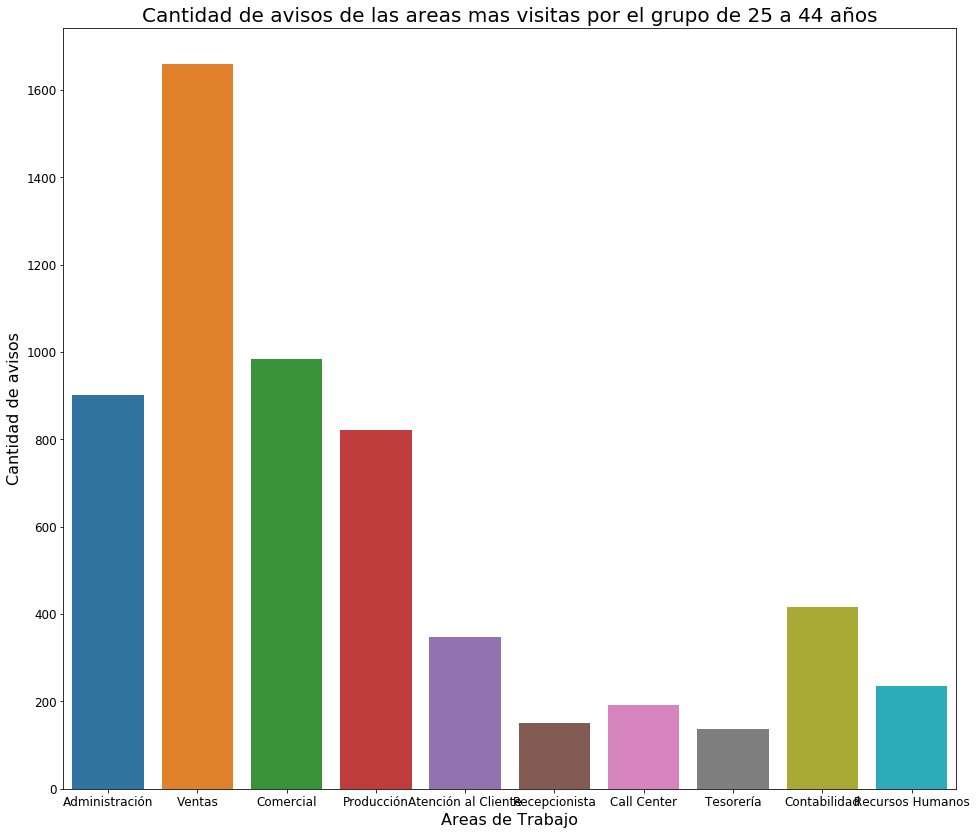

In [24]:
plt.subplots(figsize = (16, 14))
cantidadAvisosAreaMasVisitadaPlot2 = sns.barplot(x = cantidadAvisosAreaMasVisitadas2['nombre_area'], y = cantidadAvisosAreaMasVisitadas2['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMasVisitadaPlot2.set_title("Cantidad de avisos de las areas mas visitas por el grupo de 25 a 44 años", fontsize = 20)
cantidadAvisosAreaMasVisitadaPlot2.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMasVisitadaPlot2.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMasVisitadaPlot2.tick_params(labelsize = 12)
plt.show()

#### 1.2.5 - Grafico acumulado con las cantidad de visitas y publicaciones de las areas mas vistas para el grupo de 25 a 34 años.

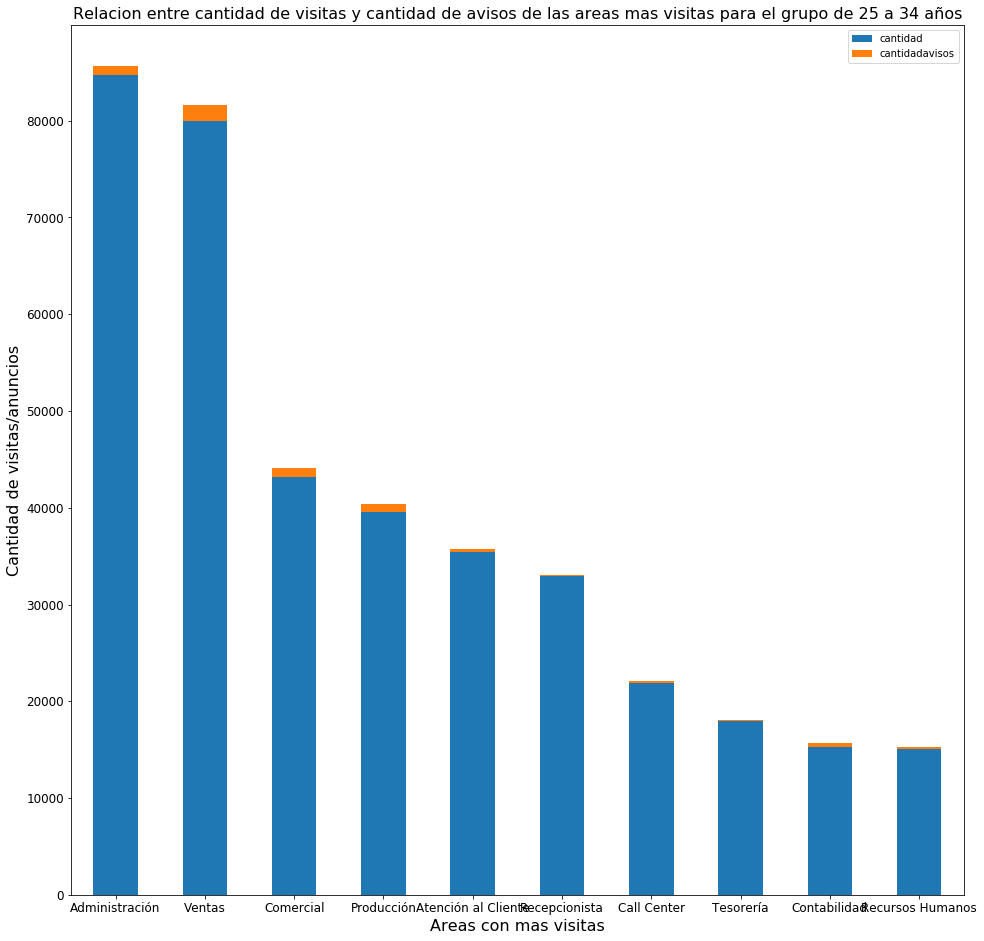

In [25]:
areaMasVisitadasPlotAcumulado2 = cantidadAvisosAreaMasVisitadas2.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 0)
areaMasVisitadasPlotAcumulado2.set_xlabel("Areas con mas visitas", fontsize = 16)
areaMasVisitadasPlotAcumulado2.set_ylabel("Cantidad de visitas/anuncios", fontsize = 16)
areaMasVisitadasPlotAcumulado2.set_title("Relacion entre cantidad de visitas y cantidad de avisos de las areas mas visitas para el grupo de 25 a 34 años", fontsize = 16)
plt.show()

#### 1.2.6 - Tabla con la lista de las areas menos visitadas por el grupo de 25 a 34 años.

In [26]:
areaMenosVisitadas2

,nombre_area,cantidad
107,Medio Ambiente,17
45,Dirección,17
151,Traduccion,16
43,Data Warehousing,11
84,Ingeniería Geológica,11
68,Finanzas Internacionales,11
143,Tecnico de Seguros,9
157,Veterinaria,9
31,Comunicaciones Externas,6
63,Exploración Minera y Petroquimica,6


#### 1.2.7 - Grafico que muestra las areas menos vistadas para el grupo de 25 a 34 años.

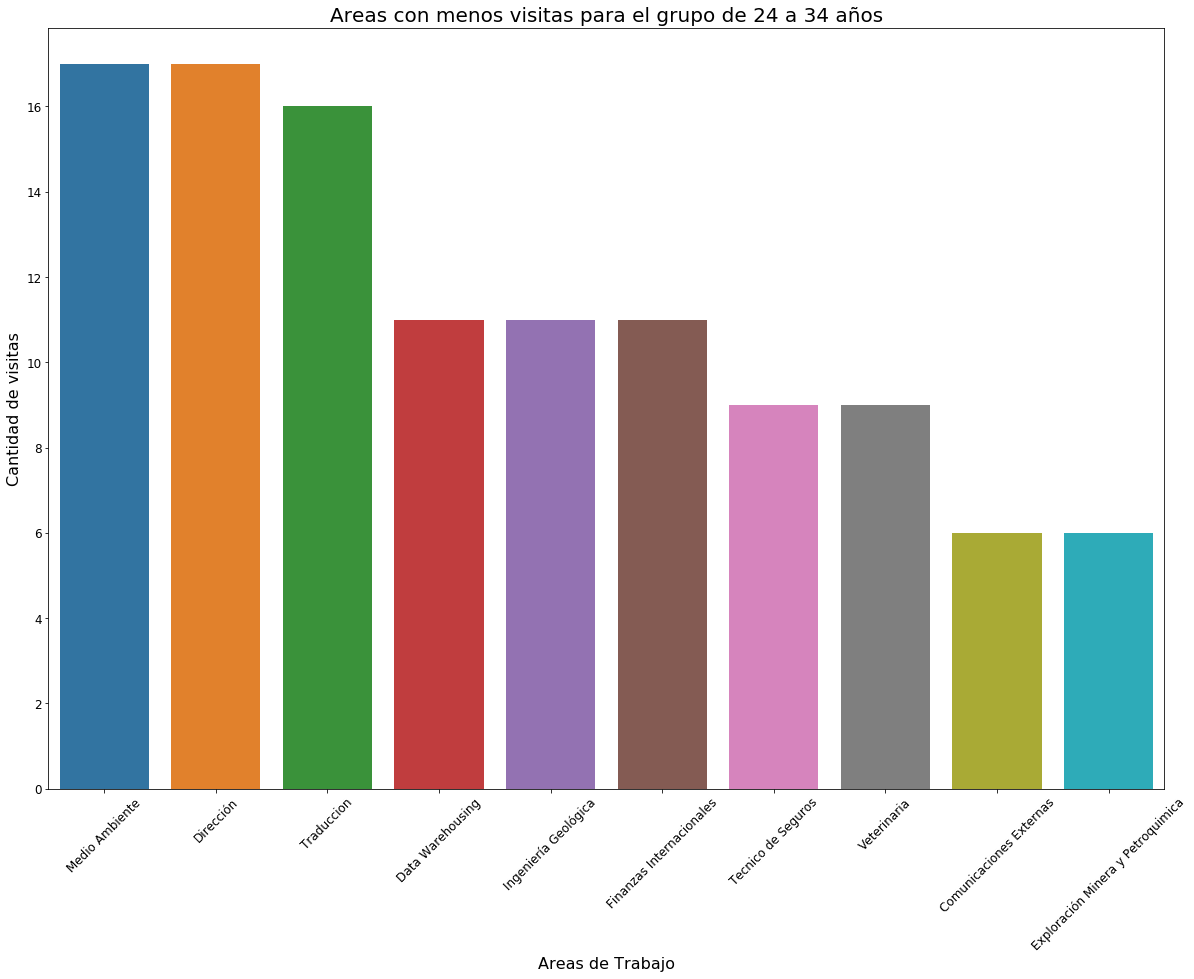

In [27]:
plt.subplots(figsize = (20, 14))
areaMenosVisitadas2Plot = sns.barplot(x = areaMenosVisitadas2['nombre_area'], y = areaMenosVisitadas2['cantidad'], orient = 'v')
areaMenosVisitadas2Plot.set_title("Areas con menos visitas para el grupo de 24 a 34 años", fontsize = 20)
areaMenosVisitadas2Plot.set_ylabel("Cantidad de visitas", fontsize = 16)
areaMenosVisitadas2Plot.set_xlabel("Areas de Trabajo", fontsize = 16)
areaMenosVisitadas2Plot.set_xticklabels(areaMenosVisitadas2Plot.get_xticklabels(), rotation = 45)
areaMenosVisitadas2Plot.tick_params(labelsize = 12)
plt.show()

#### 1.2.8 - Tabla con la cantidad de avisos para las areas menos visitadas para el grupo de 25 a 34 años.

In [28]:
cantidadAvisosAreaMenosVisitadas2

,nombre_area,cantidad,cantidadavisos
0,Medio Ambiente,17,5
1,Dirección,17,2
2,Traduccion,16,1
3,Data Warehousing,11,2
4,Ingeniería Geológica,11,2
5,Finanzas Internacionales,11,5
6,Tecnico de Seguros,9,4
7,Veterinaria,9,6
8,Comunicaciones Externas,6,1
9,Exploración Minera y Petroquimica,6,1


#### 1.2.9 - Grafico que muestra la cantidad de avisos de las areas menos visitadas por el grupo de 25 a 34 años.

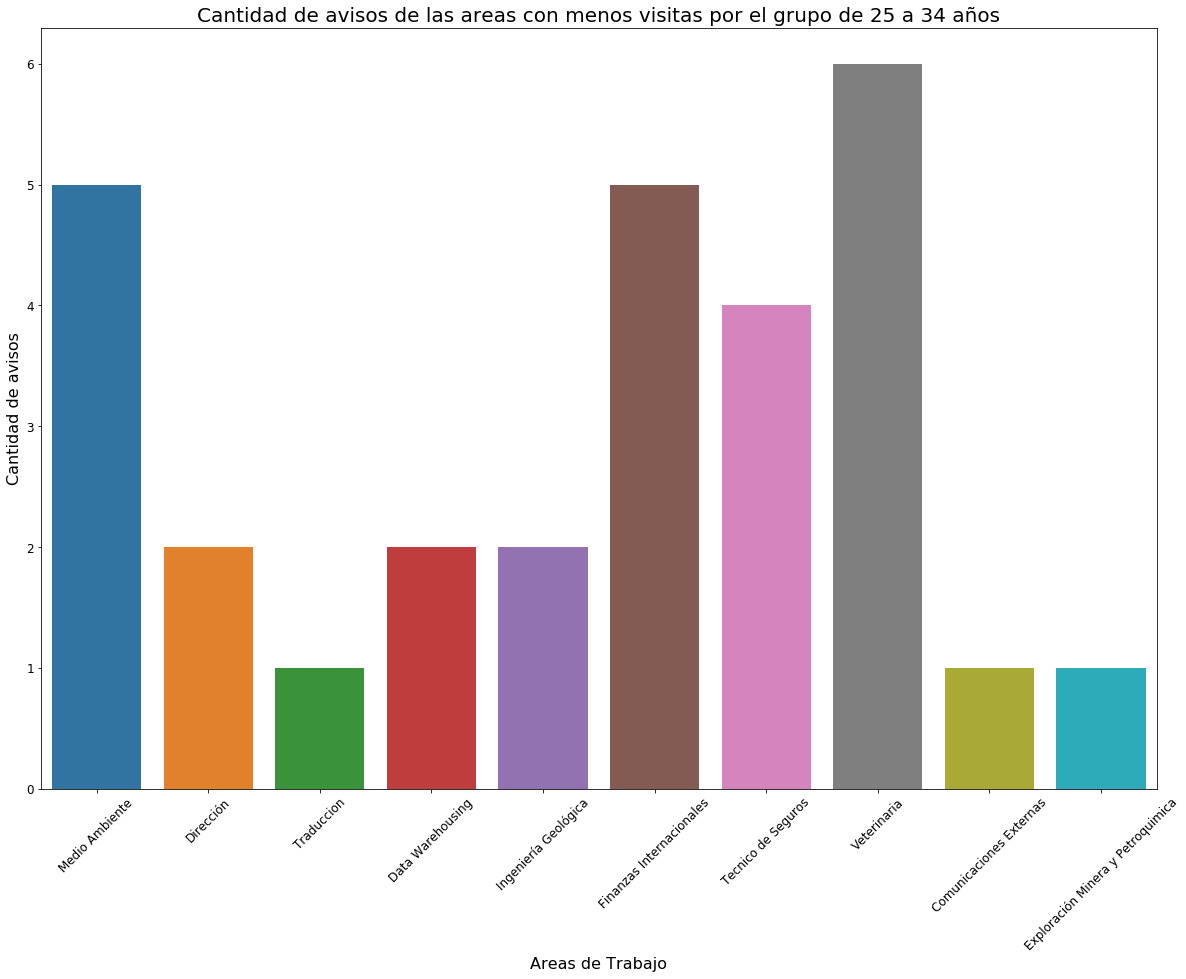

In [29]:
plt.subplots(figsize = (20, 14))
cantidadAvisosAreaMenosVisitadaPlot2 = sns.barplot(x = cantidadAvisosAreaMenosVisitadas2['nombre_area'], y = cantidadAvisosAreaMenosVisitadas2['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMenosVisitadaPlot2.set_title("Cantidad de avisos de las areas con menos visitas por el grupo de 25 a 34 años", fontsize = 20)
cantidadAvisosAreaMenosVisitadaPlot2.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMenosVisitadaPlot2.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMenosVisitadaPlot2.set_xticklabels(cantidadAvisosAreaMenosVisitadaPlot2.get_xticklabels(), rotation = 45)
cantidadAvisosAreaMenosVisitadaPlot2.tick_params(labelsize = 12)
plt.show()

#### 1.2.10 - Grafico acumulado con las cantidad de visitas y avisos de las areas menos vistas para el grupo de 25 a 34 años.

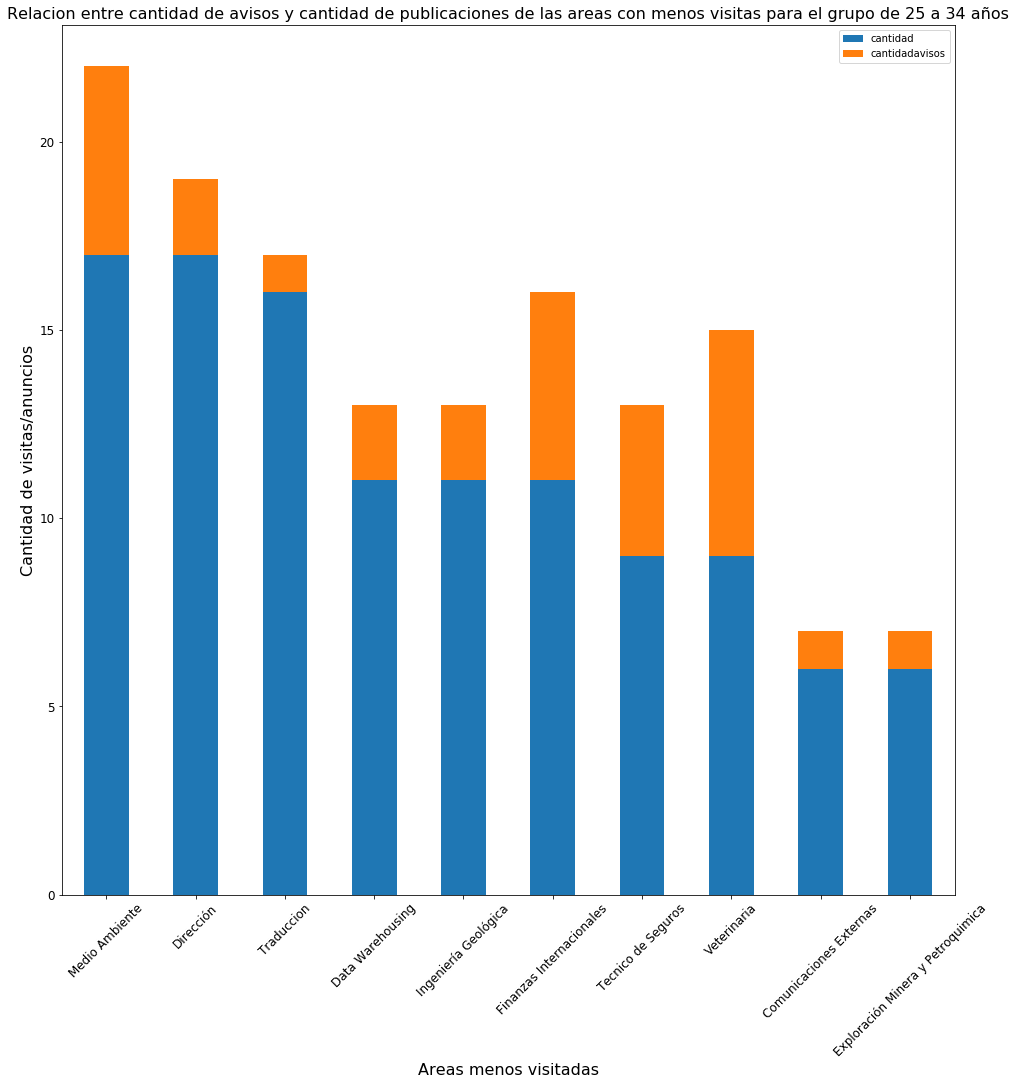

In [30]:
areaMenosVisitadasPlotAcumulado2 = cantidadAvisosAreaMenosVisitadas2.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 45)
areaMenosVisitadasPlotAcumulado2.set_xlabel("Areas menos visitadas", fontsize = 16)
areaMenosVisitadasPlotAcumulado2.set_ylabel("Cantidad de visitas/anuncios", fontsize = 16)
areaMenosVisitadasPlotAcumulado2.set_title("Relacion entre cantidad de avisos y cantidad de publicaciones de las areas con menos visitas para el grupo de 25 a 34 años", fontsize = 16)
plt.show()

### 1.3 - Análisis para el grupo de mas de 35 años.

#### 1.3.1 - Tabla con la lista de las areas mas visitadas por el grupo de mas de 35 años.

In [31]:
areaMasVisitadas3

,nombre_area,cantidad
2,Administración,34769
155,Ventas,33760
24,Comercial,23743
119,Producción,20208
13,Atención al Cliente,12415
126,Recepcionista,12091
127,Recursos Humanos,9796
21,Call Center,9401
35,Contabilidad,8813
101,Mantenimiento y Limpieza,8000


#### 1.3.2 - Grafico que muestra las areas más vistadas para el grupo de mas de 35 años.

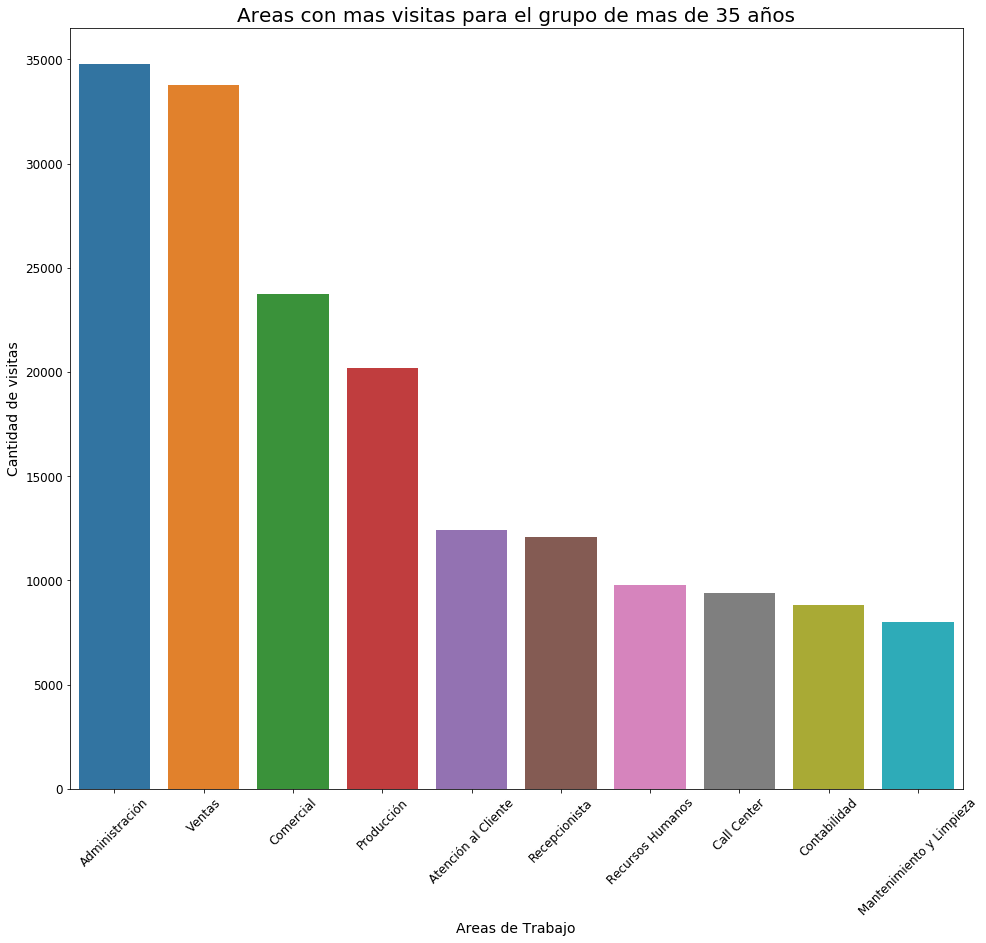

In [32]:
plt.subplots(figsize = (16, 14))
areaMasVisitadas3Plot = sns.barplot(x = areaMasVisitadas3['nombre_area'], y = areaMasVisitadas3['cantidad'], orient = 'v')
areaMasVisitadas3Plot.set_title("Areas con mas visitas para el grupo de mas de 35 años", fontsize = 20)
areaMasVisitadas3Plot.set_ylabel("Cantidad de visitas", fontsize = 14)
areaMasVisitadas3Plot.set_xlabel("Areas de Trabajo", fontsize = 14)
areaMasVisitadas3Plot.tick_params(labelsize = 12)
areaMasVisitadas3Plot.set_xticklabels(areaMasVisitadas3Plot.get_xticklabels(), rotation = 45)
plt.show()

#### 1.3.3 - Tabla con la cantidad de avisos para las areas mas visitadas por el grupo de mas de 35 años.

In [33]:
cantidadAvisosAreaMasVisitadas3

,nombre_area,cantidad,cantidadavisos
0,Administración,34769,901
1,Ventas,33760,1659
2,Comercial,23743,983
3,Producción,20208,821
4,Atención al Cliente,12415,347
5,Recepcionista,12091,151
6,Recursos Humanos,9796,235
7,Call Center,9401,191
8,Contabilidad,8813,416
9,Mantenimiento y Limpieza,8000,141


#### 1.3.4 - Grafico que muestra la cantidad de avisos de las areas mas visitadas por el grupo de mas de 35 años.

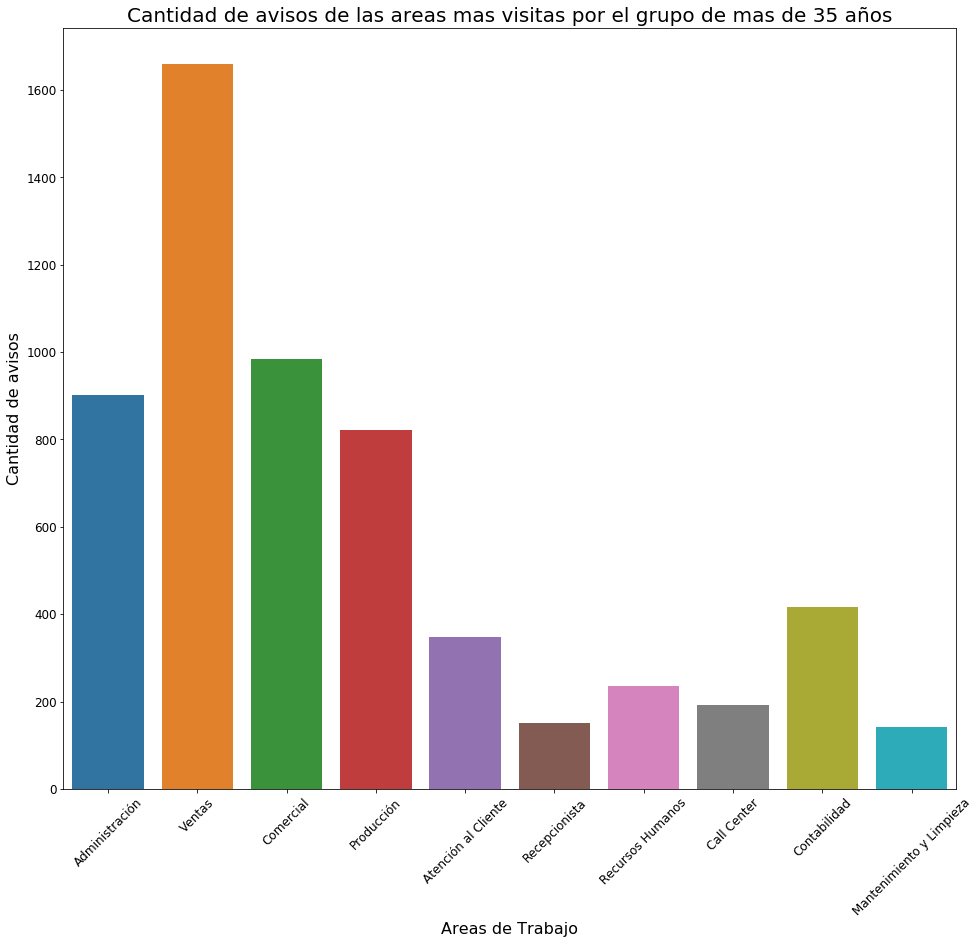

In [34]:
plt.subplots(figsize = (16, 14))
cantidadAvisosAreaMasVisitadaPlot3 = sns.barplot(x = cantidadAvisosAreaMasVisitadas3['nombre_area'], y = cantidadAvisosAreaMasVisitadas3['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMasVisitadaPlot3.set_title("Cantidad de avisos de las areas mas visitas por el grupo de mas de 35 años", fontsize = 20)
cantidadAvisosAreaMasVisitadaPlot3.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMasVisitadaPlot3.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMasVisitadaPlot3.tick_params(labelsize = 12)
cantidadAvisosAreaMasVisitadaPlot3.set_xticklabels(cantidadAvisosAreaMasVisitadaPlot3.get_xticklabels(), rotation = 45)
plt.show()

#### 1.3.5 - Grafico acumulado con las cantidad de visitas y publicaciones de las areas mas vistas para el grupo de mas de 35 años.

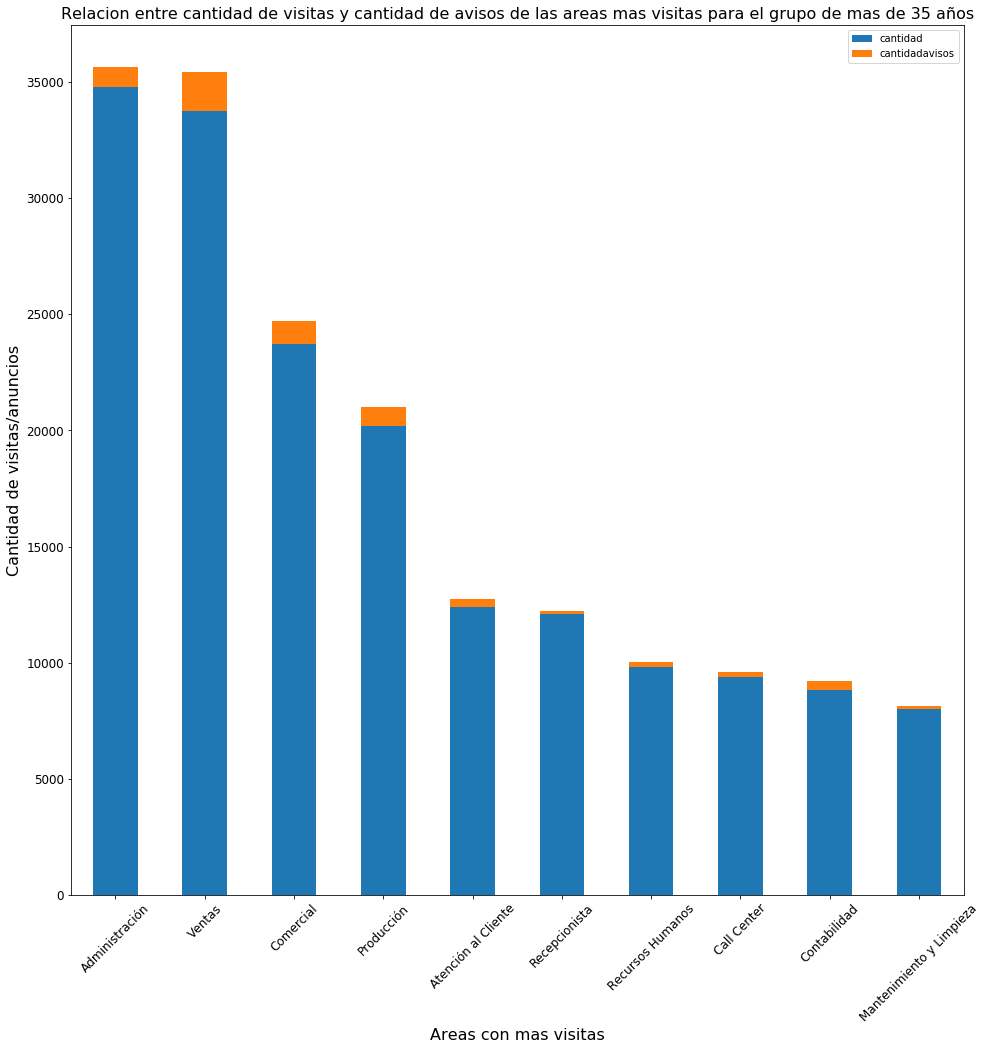

In [35]:
areaMasVisitadasPlotAcumulado3 = cantidadAvisosAreaMasVisitadas3.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 0)
areaMasVisitadasPlotAcumulado3.set_xlabel("Areas con mas visitas", fontsize = 16)
areaMasVisitadasPlotAcumulado3.set_ylabel("Cantidad de visitas/anuncios", fontsize = 16)
areaMasVisitadasPlotAcumulado3.set_title("Relacion entre cantidad de visitas y cantidad de avisos de las areas mas visitas para el grupo de mas de 35 años", fontsize = 16)
areaMasVisitadasPlotAcumulado3.set_xticklabels(areaMasVisitadasPlotAcumulado3.get_xticklabels(), rotation = 45)
plt.show()

#### 1.3.6 - Tabla con la lista de las areas menos visitadas por el grupo de mas de 35 años.

In [36]:
areaMenosVisitadas3

,nombre_area,cantidad
44,Dirección,13
157,Veterinaria,11
107,Multimedia,10
42,Data Warehousing,8
151,Traduccion,6
82,Ingeniería Geológica,5
47,Diseño 3D,5
130,Responsabilidad Social,4
142,Tecnico de Seguros,3
150,Trabajo Social,2


#### 1.3.7 - Grafico que muestra las areas menos vistadas para el grupo de mas de 35 años.

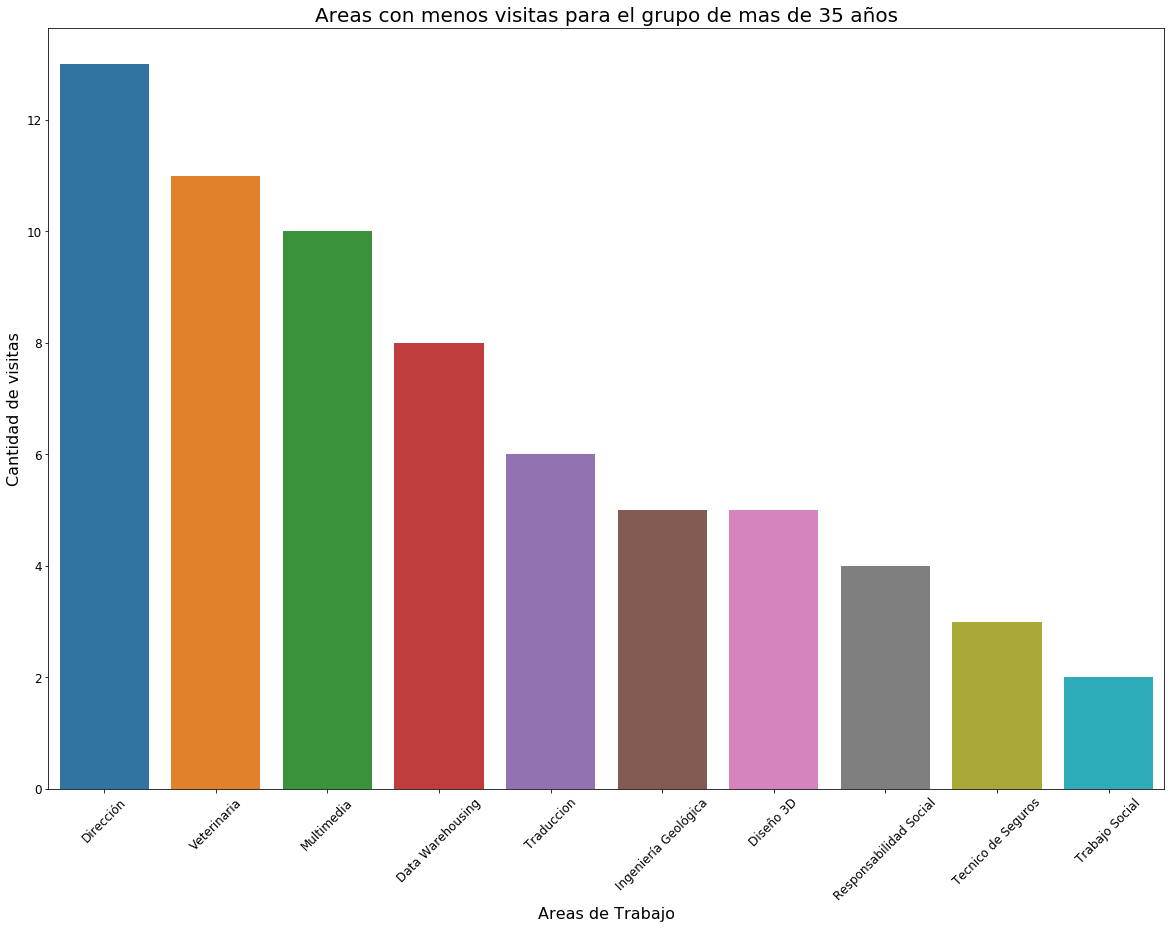

In [37]:
plt.subplots(figsize = (20, 14))
areaMenosVisitadas3Plot = sns.barplot(x = areaMenosVisitadas3['nombre_area'], y = areaMenosVisitadas3['cantidad'], orient = 'v')
areaMenosVisitadas3Plot.set_title("Areas con menos visitas para el grupo de mas de 35 años", fontsize = 20)
areaMenosVisitadas3Plot.set_ylabel("Cantidad de visitas", fontsize = 16)
areaMenosVisitadas3Plot.set_xlabel("Areas de Trabajo", fontsize = 16)
areaMenosVisitadas3Plot.set_xticklabels(areaMenosVisitadas3Plot.get_xticklabels(), rotation = 45)
areaMenosVisitadas3Plot.tick_params(labelsize = 12)
plt.show()

#### 1.3.8 - Tabla con la cantidad de avisos para las areas menos visitadas para el grupo de mas de 35 años.

In [38]:
cantidadAvisosAreaMenosVisitadas3

,nombre_area,cantidad,cantidadavisos
0,Dirección,13,2
1,Veterinaria,11,6
2,Multimedia,10,4
3,Data Warehousing,8,2
4,Traduccion,6,1
5,Ingeniería Geológica,5,2
6,Diseño 3D,5,2
7,Responsabilidad Social,4,2
8,Tecnico de Seguros,3,4
9,Trabajo Social,2,2


#### 1.3.9 - Grafico que muestra la cantidad de avisos de las areas menos visitadas por el grupo de mas de 35 años.

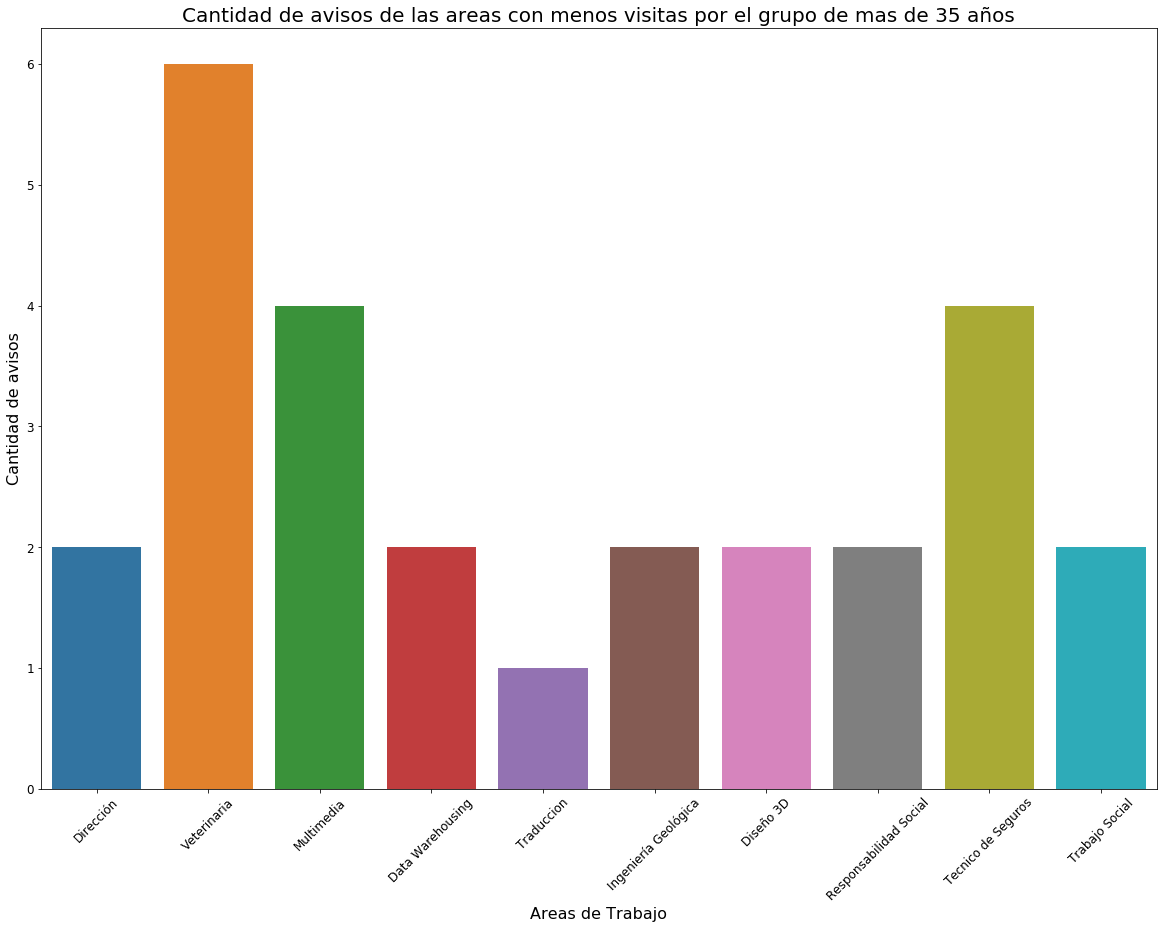

In [39]:
plt.subplots(figsize = (20, 14))
cantidadAvisosAreaMenosVisitadaPlot3 = sns.barplot(x = cantidadAvisosAreaMenosVisitadas3['nombre_area'], y = cantidadAvisosAreaMenosVisitadas3['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMenosVisitadaPlot3.set_title("Cantidad de avisos de las areas con menos visitas por el grupo de mas de 35 años", fontsize = 20)
cantidadAvisosAreaMenosVisitadaPlot3.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMenosVisitadaPlot3.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMenosVisitadaPlot3.set_xticklabels(cantidadAvisosAreaMenosVisitadaPlot3.get_xticklabels(), rotation = 45)
cantidadAvisosAreaMenosVisitadaPlot3.tick_params(labelsize = 12)
plt.show()

#### 1.3.10 - Grafico acumulado con las cantidad de visitas y avisos de las areas menos vistas para el grupo de mas de 35 años.

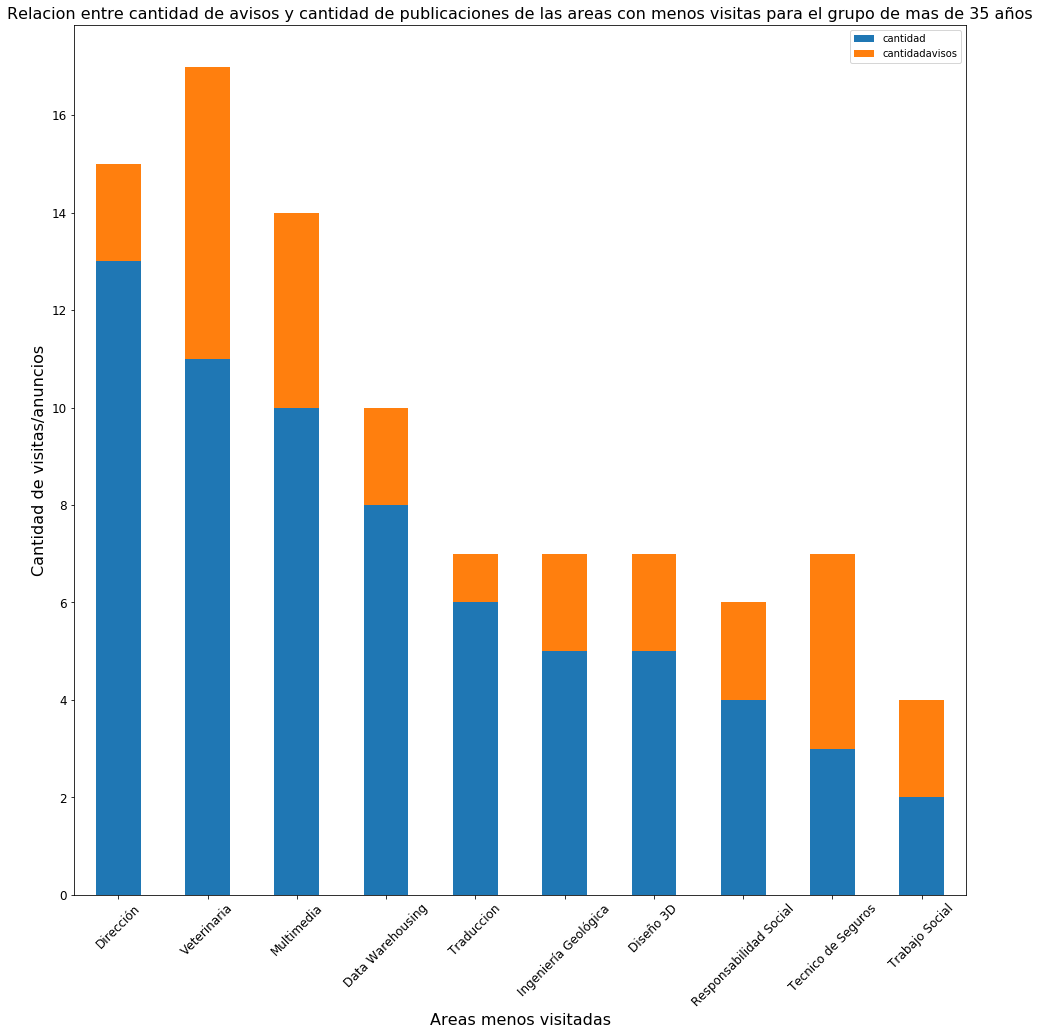

In [40]:
areaMenosVisitadasPlotAcumulado3 = cantidadAvisosAreaMenosVisitadas3.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 45)
areaMenosVisitadasPlotAcumulado3.set_xlabel("Areas menos visitadas", fontsize = 16)
areaMenosVisitadasPlotAcumulado3.set_ylabel("Cantidad de visitas/anuncios", fontsize = 16)
areaMenosVisitadasPlotAcumulado3.set_title("Relacion entre cantidad de avisos y cantidad de publicaciones de las areas con menos visitas para el grupo de mas de 35 años", fontsize = 16)
plt.show()

## 2) ¿Cuáles son las areas de trabajo que reciben mas postulaciones de los diferentes grupos?

In [90]:
# Tomo del dataframe de postulaciones el nombre de area y la edad solamente.
areaPostulaciones = postulaciones[['nombre_area', 'edad']]

# Elimino los registros sin datos.
areaPostulaciones.dropna(subset = ['nombre_area'], inplace = True)
areaPostulaciones.dropna(subset = ['edad'], inplace = True)

# Agrego una columna cantidad para que luego haga las veces de contador en el group by.
areaPostulaciones['cantidad'] = 1

# Divido el dataframe en los 3 grupos de edades.
areaPostulada1 = areaPostulaciones[areaPostulaciones['edad'] < 25]
areaPostulada1.drop('edad', 1, inplace = True)

areaPostulada2 = areaPostulaciones[(areaPostulaciones['edad'] >= 25) & (areaPostulaciones['edad'] < 35)]
areaPostulada2.drop('edad', 1, inplace = True)

areaPostulada3 = areaPostulaciones[areaPostulaciones['edad'] >= 35]
areaPostulada3.drop('edad', 1, inplace = True)

# Agrupo segun el area.
areaPostulada1 = areaPostulada1.groupby(['nombre_area'], as_index = False).count()
areaPostulada2 = areaPostulada2.groupby(['nombre_area'], as_index = False).count()
areaPostulada3 = areaPostulada3.groupby(['nombre_area'], as_index = False).count()

# Ordeno de mayor a menor.
areaPostulada1 = areaPostulada1.sort_values(by = 'cantidad', ascending = False)
areaPostulada2 = areaPostulada2.sort_values(by = 'cantidad', ascending = False)
areaPostulada3 = areaPostulada3.sort_values(by = 'cantidad', ascending = False)

# Tomo las 10 areas mas visitadas de cada grupo.
areaMasPostulada1 = areaPostulada1.head(10)
areaMasPostulada2 = areaPostulada2.head(10)
areaMasPostulada3 = areaPostulada3.head(10)

# En este analisis se va a analizar la relacion entre la cantidad de avisos de un area y la cantidad de visitas 
# a los avisos de dicha area.

# Agrego a los dataframes de postulaciones de areas el contador de la cantidad de avisos del area en cuestion.
cantidadAvisosAreaMasPostulada1 = pd.merge(areaMasPostulada1, cantidadAvisosArea, on = 'nombre_area', how = 'left')
cantidadAvisosAreaMasPostulada2 = pd.merge(areaMasPostulada2, cantidadAvisosArea, on = 'nombre_area', how = 'left')
cantidadAvisosAreaMasPostulada3 = pd.merge(areaMasPostulada3, cantidadAvisosArea, on = 'nombre_area', how = 'left')

### 2.1 - Análisis para el grupo de 18 a 24 años.

#### 2.1.1 - Tabla con la lista de las areas mas postuladas por el grupo de 18 a 24 años.

In [92]:
areaMasPostulada1

,nombre_area,cantidad
157,Ventas,270743
2,Administración,153260
13,Atención al Cliente,132418
24,Comercial,109705
129,Recepcionista,104553
122,Producción,98094
21,Call Center,93466
150,Telemarketing,71822
151,Tesorería,44691
69,Gastronomia,31502


#### 2.1.2 - Grafico que muestra las areas más postuladas para el grupo de 18 a 24 años.

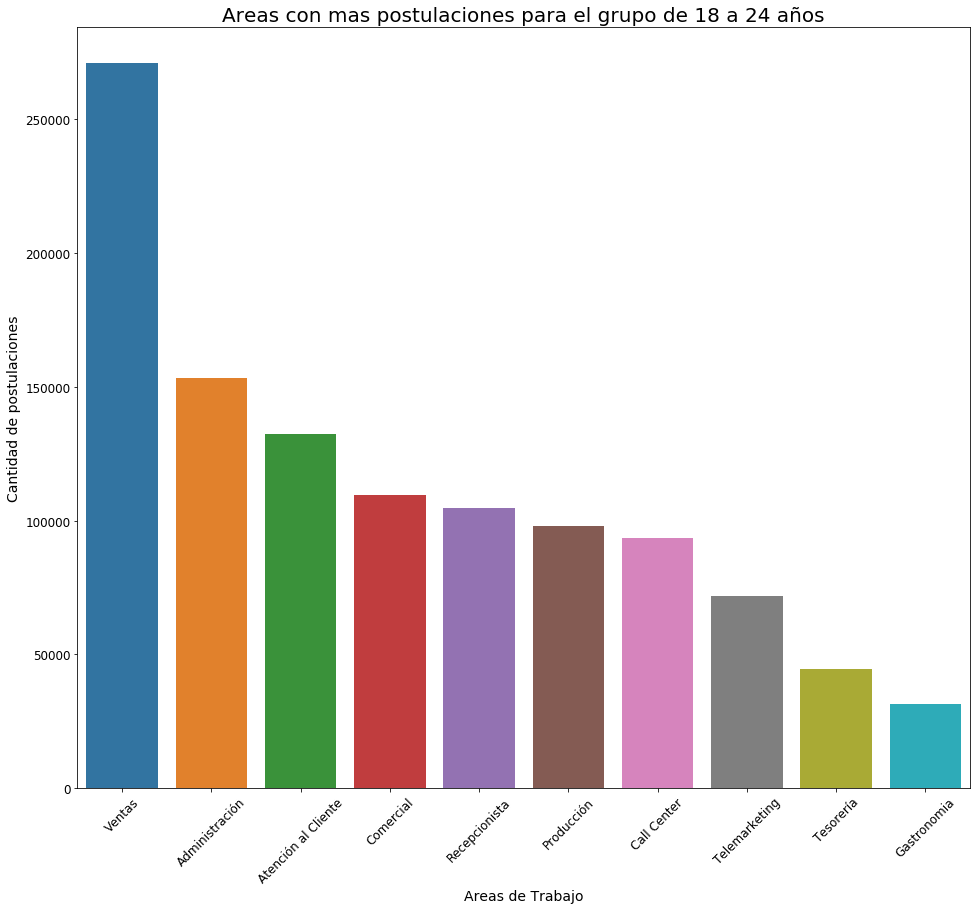

In [94]:
plt.subplots(figsize = (16, 14))
areaMasPostulada1Plot = sns.barplot(x = areaMasPostulada1['nombre_area'], y = areaMasPostulada1['cantidad'], orient = 'v')
areaMasPostulada1Plot.set_title("Areas con mas postulaciones para el grupo de 18 a 24 años", fontsize = 20)
areaMasPostulada1Plot.set_ylabel("Cantidad de postulaciones", fontsize = 14)
areaMasPostulada1Plot.set_xlabel("Areas de Trabajo", fontsize = 14)
areaMasPostulada1Plot.tick_params(labelsize = 12)
areaMasPostulada1Plot.set_xticklabels(areaMasPostulada1Plot.get_xticklabels(), rotation = 45)
plt.show()

#### 2.1.3 - Tabla con la cantidad de avisos para las areas mas postuladas por el grupo de 18 a 24 años.

In [95]:
cantidadAvisosAreaMasPostulada1

,nombre_area,cantidad,cantidadavisos
0,Ventas,270743,1659
1,Administración,153260,901
2,Atención al Cliente,132418,347
3,Comercial,109705,983
4,Recepcionista,104553,151
5,Producción,98094,821
6,Call Center,93466,191
7,Telemarketing,71822,138
8,Tesorería,44691,137
9,Gastronomia,31502,234


#### 2.1.4 - Grafico que muestra la cantidad de avisos de las areas mas postuladas por el grupo de 18 a 24 años.

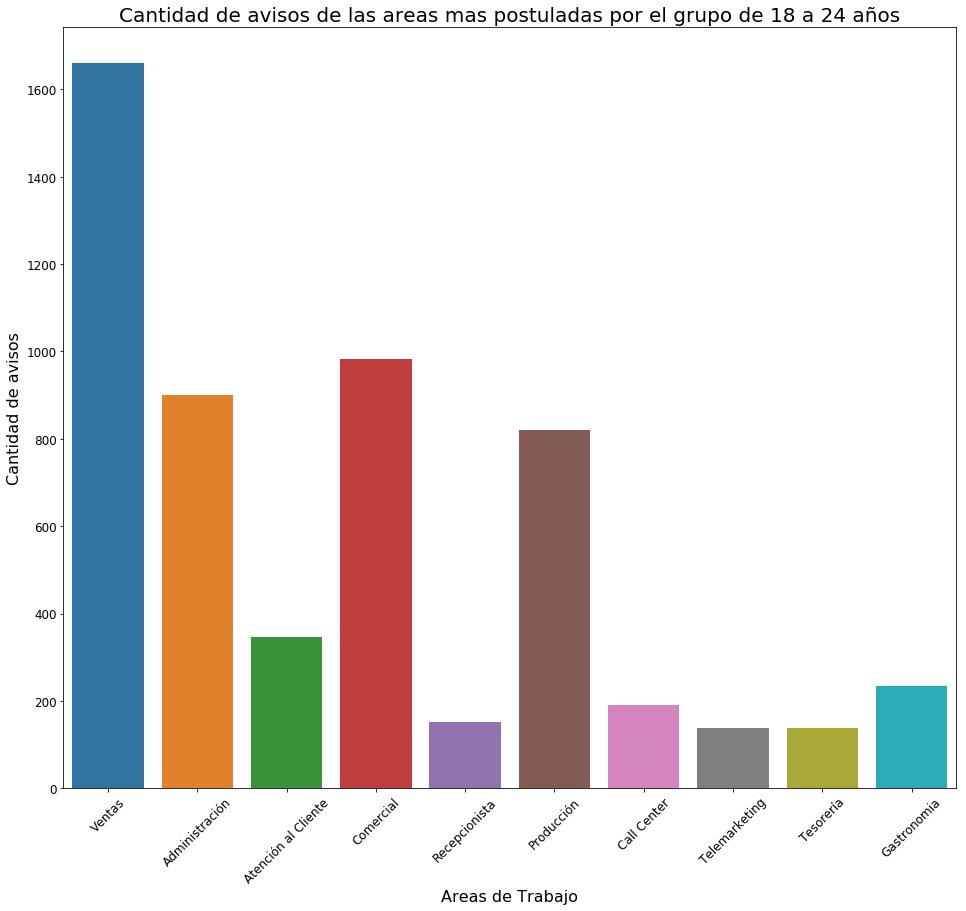

In [97]:
plt.subplots(figsize = (16, 14))
cantidadAvisosAreaMasPostuladaPlot1 = sns.barplot(x = cantidadAvisosAreaMasPostulada1['nombre_area'], y = cantidadAvisosAreaMasPostulada1['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMasPostuladaPlot1.set_title("Cantidad de avisos de las areas mas postuladas por el grupo de 18 a 24 años", fontsize = 20)
cantidadAvisosAreaMasPostuladaPlot1.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMasPostuladaPlot1.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMasPostuladaPlot1.tick_params(labelsize = 12)
cantidadAvisosAreaMasPostuladaPlot1.set_xticklabels(cantidadAvisosAreaMasPostuladaPlot1.get_xticklabels(), rotation = 45)
plt.show()

#### 2.1.5 - Grafico acumulado con las cantidad de postulaciones y publicaciones de las areas mas postuladas para el grupo de 18 a 24 años.

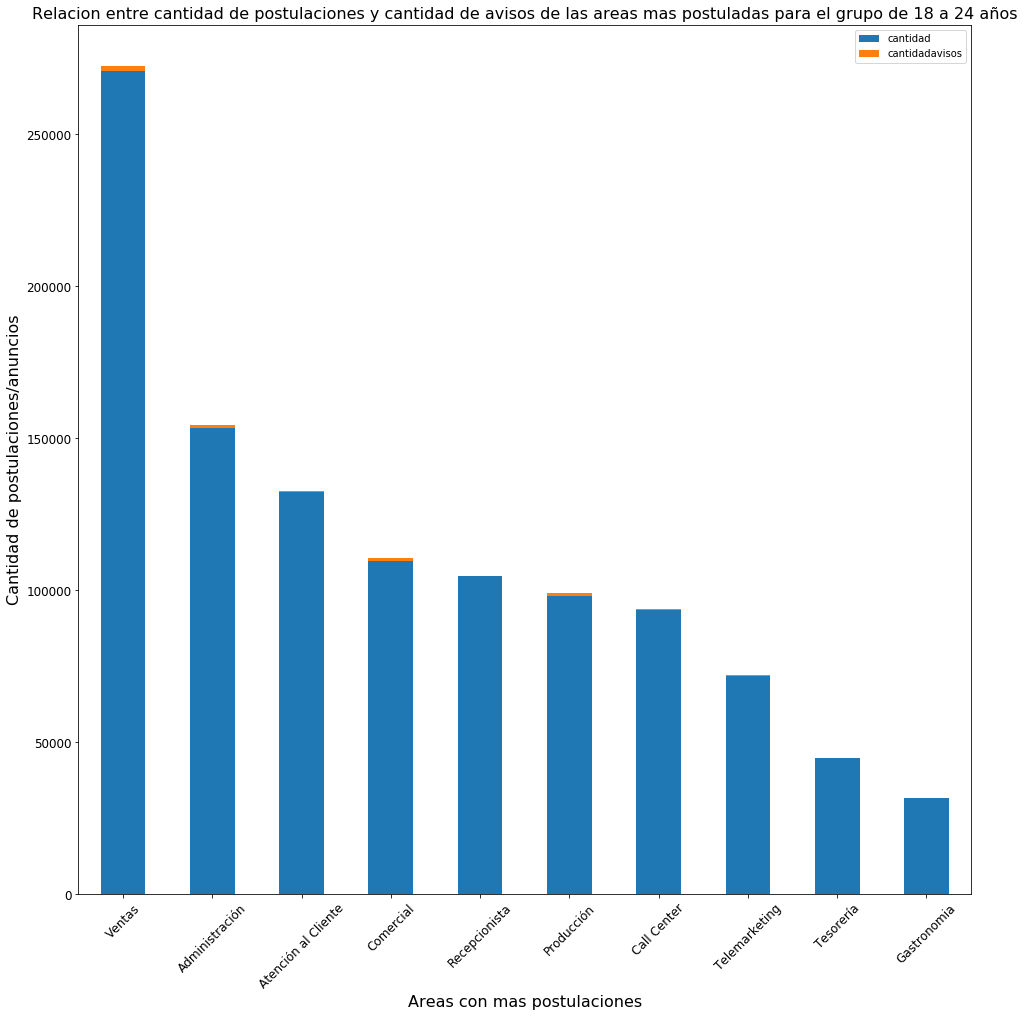

In [100]:
areaMasPostuladasPlotAcumulado1 = cantidadAvisosAreaMasPostulada1.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 0)
areaMasPostuladasPlotAcumulado1.set_xlabel("Areas con mas postulaciones", fontsize = 16)
areaMasPostuladasPlotAcumulado1.set_ylabel("Cantidad de postulaciones/anuncios", fontsize = 16)
areaMasPostuladasPlotAcumulado1.set_title("Relacion entre cantidad de postulaciones y cantidad de avisos de las areas mas postuladas para el grupo de 18 a 24 años", fontsize = 16)
areaMasPostuladasPlotAcumulado1.set_xticklabels(areaMasPostuladasPlotAcumulado1.get_xticklabels(), rotation = 45)
plt.show()

### 2.2 - Análisis para el grupo de 25 a 34 años.

#### 2.2.1 - Tabla con la lista de las areas mas postuladas por el grupo de 25 a 34 años.

In [102]:
areaMasPostulada2

,nombre_area,cantidad
160,Ventas,285884
2,Administración,272681
122,Producción,195347
24,Comercial,180419
13,Atención al Cliente,154106
129,Recepcionista,110650
21,Call Center,90427
151,Tesorería,64968
150,Telemarketing,55760
36,Contabilidad,50347


#### 2.2.2 - Grafico que muestra las areas más postuladas para el grupo de 25 a 34 años.

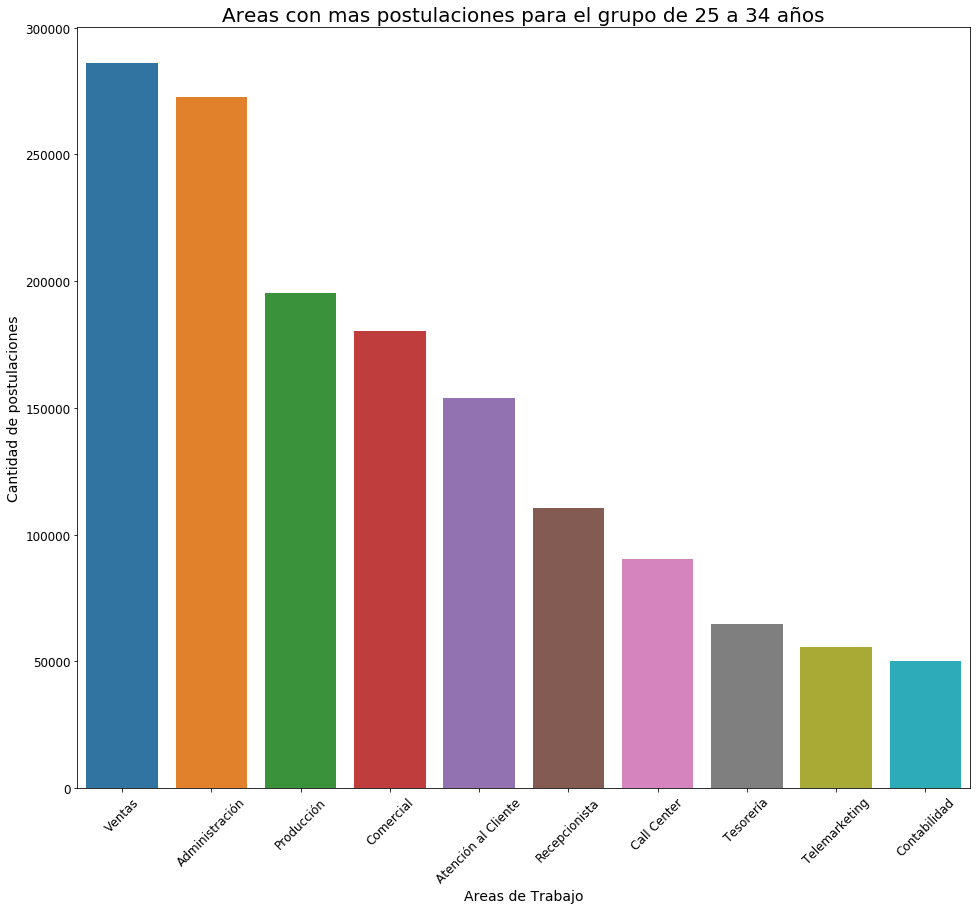

In [103]:
plt.subplots(figsize = (16, 14))
areaMasPostulada2Plot = sns.barplot(x = areaMasPostulada2['nombre_area'], y = areaMasPostulada2['cantidad'], orient = 'v')
areaMasPostulada2Plot.set_title("Areas con mas postulaciones para el grupo de 25 a 34 años", fontsize = 20)
areaMasPostulada2Plot.set_ylabel("Cantidad de postulaciones", fontsize = 14)
areaMasPostulada2Plot.set_xlabel("Areas de Trabajo", fontsize = 14)
areaMasPostulada2Plot.tick_params(labelsize = 12)
areaMasPostulada2Plot.set_xticklabels(areaMasPostulada2Plot.get_xticklabels(), rotation = 45)
plt.show()

#### 2.2.3 - Tabla con la cantidad de avisos para las areas mas postuladas por el grupo de 25 a 34 años.

In [105]:
cantidadAvisosAreaMasPostulada2

,nombre_area,cantidad,cantidadavisos
0,Ventas,285884,1659
1,Administración,272681,901
2,Producción,195347,821
3,Comercial,180419,983
4,Atención al Cliente,154106,347
5,Recepcionista,110650,151
6,Call Center,90427,191
7,Tesorería,64968,137
8,Telemarketing,55760,138
9,Contabilidad,50347,416


#### 2.2.4 - Grafico que muestra la cantidad de avisos de las areas mas postuladas por el grupo de 25 a 34 años.

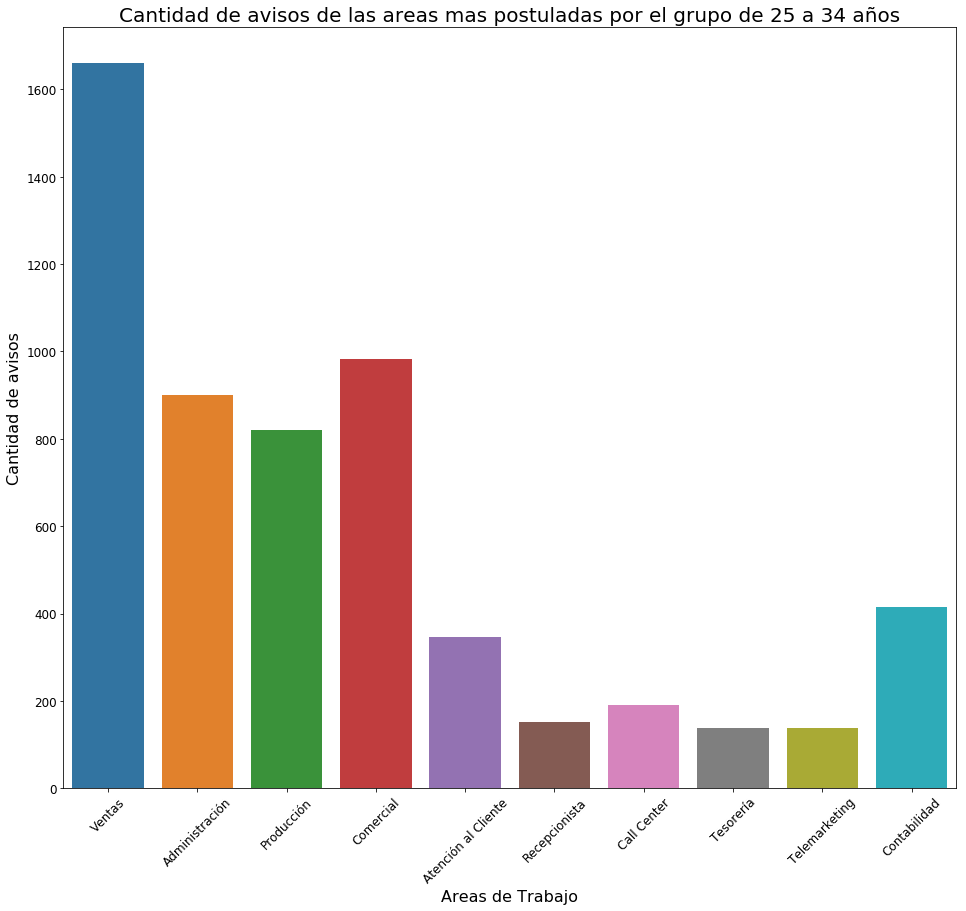

In [106]:
plt.subplots(figsize = (16, 14))
cantidadAvisosAreaMasPostuladaPlot2 = sns.barplot(x = cantidadAvisosAreaMasPostulada2['nombre_area'], y = cantidadAvisosAreaMasPostulada2['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMasPostuladaPlot2.set_title("Cantidad de avisos de las areas mas postuladas por el grupo de 25 a 34 años", fontsize = 20)
cantidadAvisosAreaMasPostuladaPlot2.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMasPostuladaPlot2.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMasPostuladaPlot2.tick_params(labelsize = 12)
cantidadAvisosAreaMasPostuladaPlot2.set_xticklabels(cantidadAvisosAreaMasPostuladaPlot2.get_xticklabels(), rotation = 45)
plt.show()

#### 2.2.5 - Grafico acumulado con las cantidad de postulaciones y publicaciones de las areas mas postuladas para el grupo de 25 a 34 años.

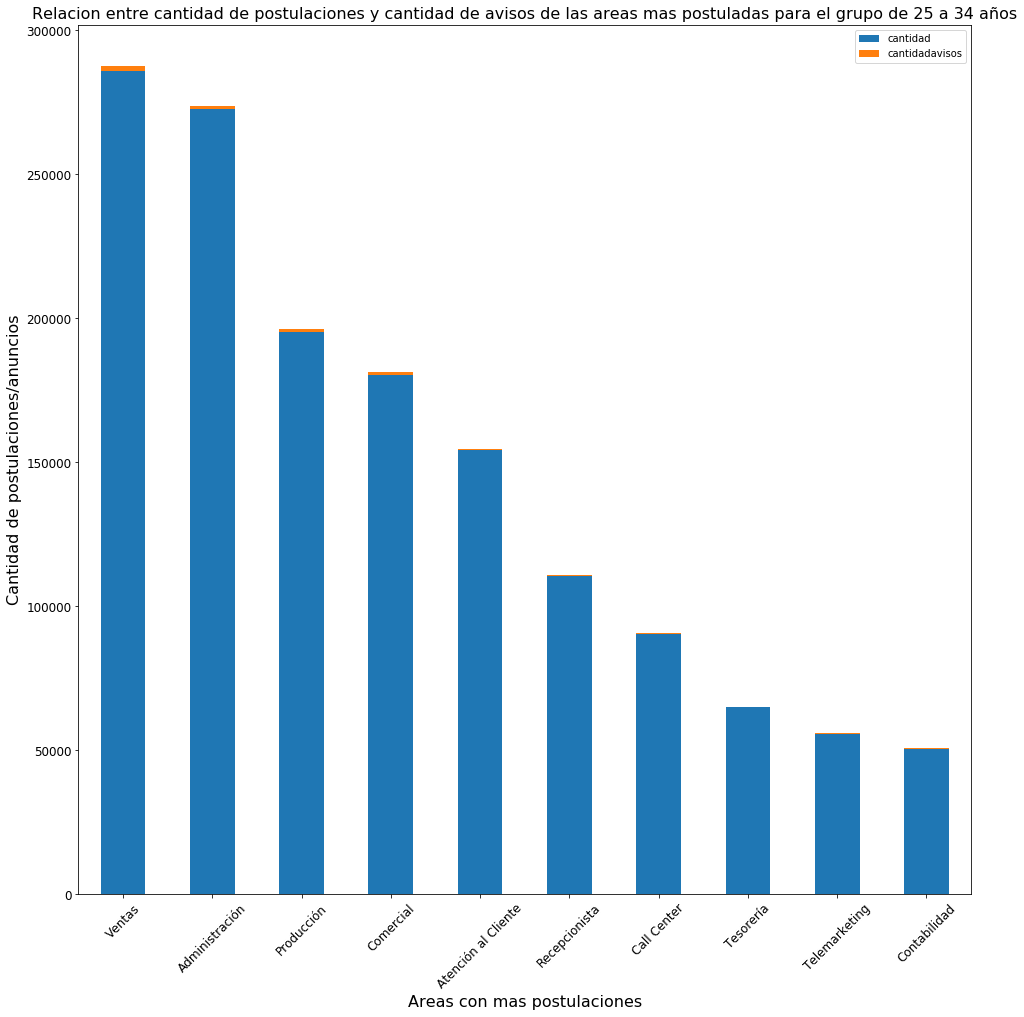

In [107]:
areaMasPostuladasPlotAcumulado2 = cantidadAvisosAreaMasPostulada2.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 0)
areaMasPostuladasPlotAcumulado2.set_xlabel("Areas con mas postulaciones", fontsize = 16)
areaMasPostuladasPlotAcumulado2.set_ylabel("Cantidad de postulaciones/anuncios", fontsize = 16)
areaMasPostuladasPlotAcumulado2.set_title("Relacion entre cantidad de postulaciones y cantidad de avisos de las areas mas postuladas para el grupo de 25 a 34 años", fontsize = 16)
areaMasPostuladasPlotAcumulado2.set_xticklabels(areaMasPostuladasPlotAcumulado2.get_xticklabels(), rotation = 45)
plt.show()

### 2.3 - Análisis para el grupo de mas de 35 años.

#### 2.3.1 - Tabla con la lista de las areas mas postuladas por el grupo de mas de 35 años.

In [109]:
areaMasPostulada3

,nombre_area,cantidad
158,Ventas,92603
2,Administración,90884
24,Comercial,77260
122,Producción,68184
13,Atención al Cliente,42069
129,Recepcionista,28975
21,Call Center,28232
36,Contabilidad,22736
130,Recursos Humanos,22695
151,Tesorería,19829


#### 2.3.2 - Grafico que muestra las areas más postuladas para el grupo de mas de 35 años.

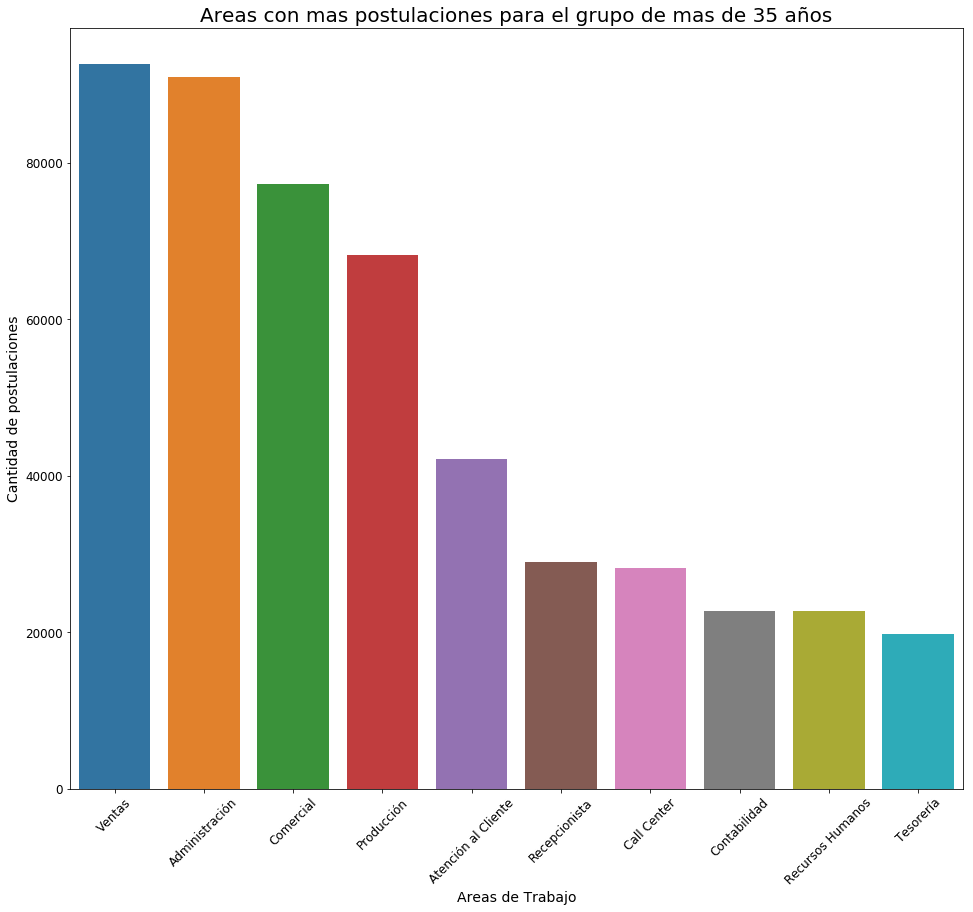

In [110]:
plt.subplots(figsize = (16, 14))
areaMasPostulada3Plot = sns.barplot(x = areaMasPostulada3['nombre_area'], y = areaMasPostulada3['cantidad'], orient = 'v')
areaMasPostulada3Plot.set_title("Areas con mas postulaciones para el grupo de mas de 35 años", fontsize = 20)
areaMasPostulada3Plot.set_ylabel("Cantidad de postulaciones", fontsize = 14)
areaMasPostulada3Plot.set_xlabel("Areas de Trabajo", fontsize = 14)
areaMasPostulada3Plot.tick_params(labelsize = 12)
areaMasPostulada3Plot.set_xticklabels(areaMasPostulada3Plot.get_xticklabels(), rotation = 45)
plt.show()

#### 2.3.3 - Tabla con la cantidad de avisos para las areas mas postuladas por el grupo de mas de 35 años.

In [111]:
cantidadAvisosAreaMasPostulada3

,nombre_area,cantidad,cantidadavisos
0,Ventas,92603,1659
1,Administración,90884,901
2,Comercial,77260,983
3,Producción,68184,821
4,Atención al Cliente,42069,347
5,Recepcionista,28975,151
6,Call Center,28232,191
7,Contabilidad,22736,416
8,Recursos Humanos,22695,235
9,Tesorería,19829,137


#### 2.3.4 - Grafico que muestra la cantidad de avisos de las areas mas postuladas por el grupo de mas de 35 años.

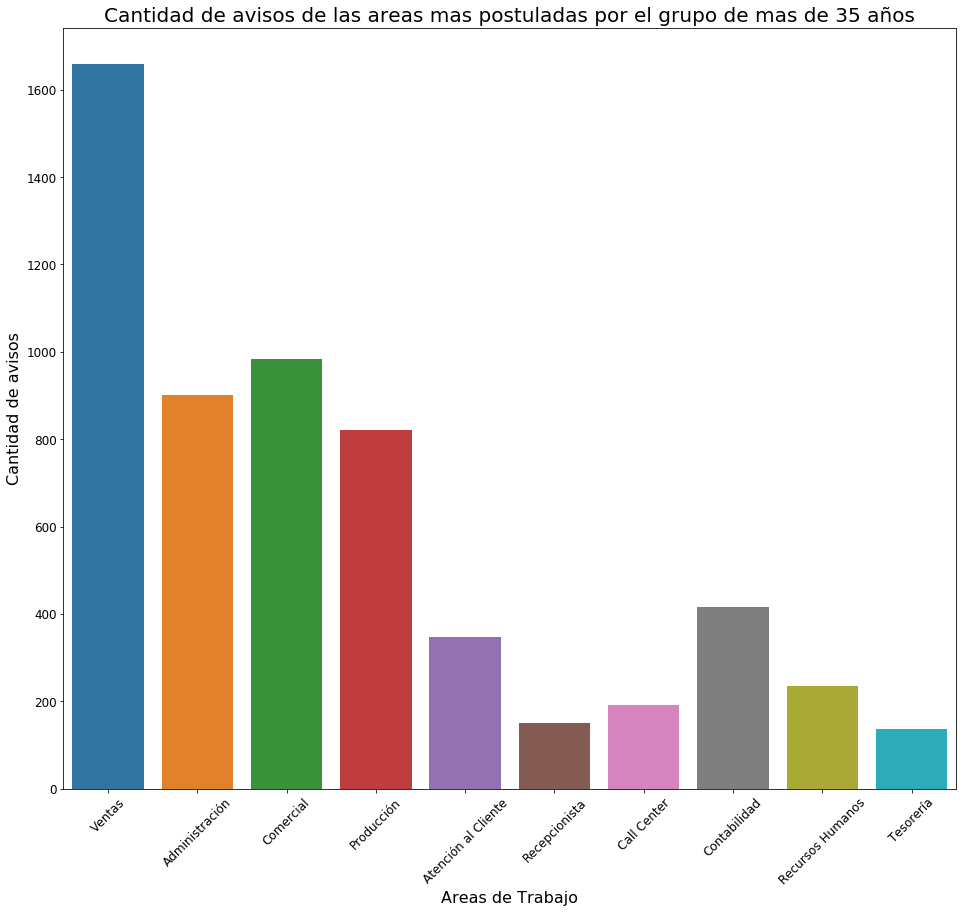

In [112]:
plt.subplots(figsize = (16, 14))
cantidadAvisosAreaMasPostuladaPlot3 = sns.barplot(x = cantidadAvisosAreaMasPostulada3['nombre_area'], y = cantidadAvisosAreaMasPostulada3['cantidadavisos'], orient = 'v')
cantidadAvisosAreaMasPostuladaPlot3.set_title("Cantidad de avisos de las areas mas postuladas por el grupo de mas de 35 años", fontsize = 20)
cantidadAvisosAreaMasPostuladaPlot3.set_ylabel("Cantidad de avisos", fontsize = 16)
cantidadAvisosAreaMasPostuladaPlot3.set_xlabel("Areas de Trabajo", fontsize = 16)
cantidadAvisosAreaMasPostuladaPlot3.tick_params(labelsize = 12)
cantidadAvisosAreaMasPostuladaPlot3.set_xticklabels(cantidadAvisosAreaMasPostuladaPlot3.get_xticklabels(), rotation = 45)
plt.show()

#### 2.3.5 - Grafico acumulado con las cantidad de postulaciones y publicaciones de las areas mas postuladas para el grupo de mas de 35 años.

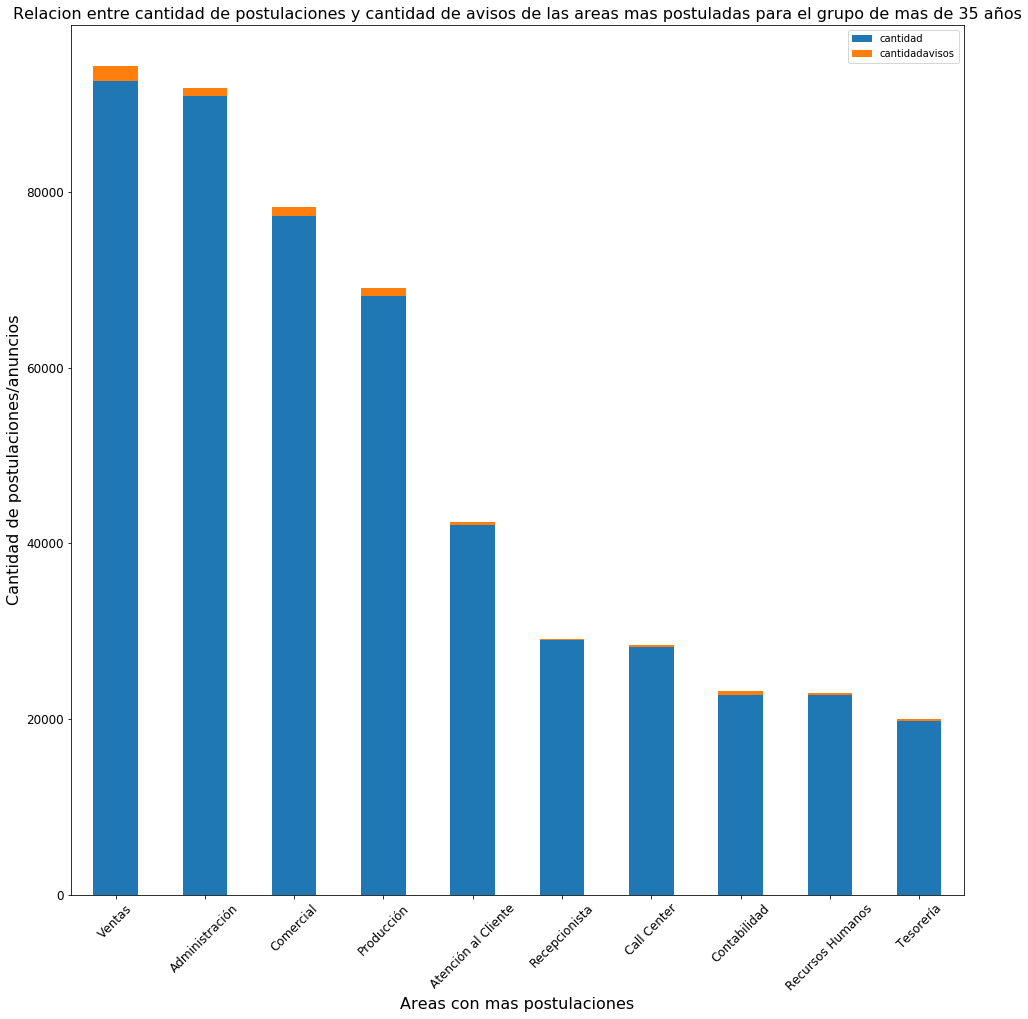

In [113]:
areaMasPostuladasPlotAcumulado3 = cantidadAvisosAreaMasPostulada3.set_index('nombre_area').plot.bar(stacked = True, figsize = (16, 16), fontsize = 12, rot = 0)
areaMasPostuladasPlotAcumulado3.set_xlabel("Areas con mas postulaciones", fontsize = 16)
areaMasPostuladasPlotAcumulado3.set_ylabel("Cantidad de postulaciones/anuncios", fontsize = 16)
areaMasPostuladasPlotAcumulado3.set_title("Relacion entre cantidad de postulaciones y cantidad de avisos de las areas mas postuladas para el grupo de mas de 35 años", fontsize = 16)
areaMasPostuladasPlotAcumulado3.set_xticklabels(areaMasPostuladasPlotAcumulado3.get_xticklabels(), rotation = 45)
plt.show()